In [1]:
pip install mtgsdk

  Created wheel for mtgsdk: filename=mtgsdk-1.3.1-py3-none-any.whl size=13926 sha256=670f23988cba884d4fa54d9f47e48172cfc8c6c2c3dcad3eb1d094ecbcf6ae86
  Stored in directory: c:\users\patri\appdata\local\pip\cache\wheels\13\b4\0d\d22b3e61b8ee5b6377b891165a1338196c11fc133673fe002b
Successfully built mtgsdk
Note: you may need to restart the kernel to use updated packages.


In [18]:
from mtgsdk import Card
from mtgsdk import Set
from mtgsdk import Type
from mtgsdk import Supertype
from mtgsdk import Subtype
from mtgsdk import Changelog
import pandas as pd

In [3]:
card = Card.find(386616)
card

In [17]:
cols = ["name", "multiverse_id", "layout", "names", "mana_cost", "cmc", "colors", "color_identity", "type", "supertypes", 
        "subtypes", "rarity", "text", "flavor", "artist", "number", "power", "toughness", "loyalty", "variations", "watermark",
        "border", "timeshifted", "hand", "life", "reserved", "release_date", "starter", "rulings", "foreign_names", "printings", 
        "original_text", "original_type", "legalities", "source", "image_url", "set", "set_name", "id"]

for col in cols:
    try:
        print(col, getattr(card, col))
    except:
        print(col + " None")

name Narset, Enlightened Master
multiverse_id 386616
layout normal
names None
mana_cost {3}{U}{R}{W}
cmc 6.0
colors ['Red', 'Blue', 'White']
color_identity ['R', 'U', 'W']
type Legendary Creature — Human Monk
supertypes ['Legendary']
subtypes ['Human', 'Monk']
rarity Mythic
text First strike, hexproof
Whenever Narset, Enlightened Master attacks, exile the top four cards of your library. Until end of turn, you may cast noncreature spells from among those cards without paying their mana costs.
flavor None
artist Magali Villeneuve
number 190
power 3
toughness 2
loyalty None
variations None
watermark jeskai
border None
timeshifted None
hand None
life None
reserved None
release_date None
starter None
rulings [{'date': '2014-09-20', 'text': 'The cards are exiled face up. Casting the noncreature cards exiled this way follows the normal rules for casting those cards. You must follow all applicable timing rules. For example, if one of the exiled cards is a sorcery card, you can cast it only dur

In [22]:
def setCardDict(card, cols):
    card_dict = {}
    for col in cols:
        try:
            card_dict[col] = getattr(card, col)
        except:
            card_dict[col] = None
            
    return card_dict

In [23]:
print(setCardDict(card, cols))

{'name': 'Narset, Enlightened Master', 'multiverse_id': '386616', 'layout': 'normal', 'names': None, 'mana_cost': '{3}{U}{R}{W}', 'cmc': 6.0, 'colors': ['Red', 'Blue', 'White'], 'color_identity': ['R', 'U', 'W'], 'type': 'Legendary Creature — Human Monk', 'supertypes': ['Legendary'], 'subtypes': ['Human', 'Monk'], 'rarity': 'Mythic', 'text': 'First strike, hexproof\nWhenever Narset, Enlightened Master attacks, exile the top four cards of your library. Until end of turn, you may cast noncreature spells from among those cards without paying their mana costs.', 'flavor': None, 'artist': 'Magali Villeneuve', 'number': '190', 'power': '3', 'toughness': '2', 'loyalty': None, 'variations': None, 'watermark': 'jeskai', 'border': None, 'timeshifted': None, 'hand': None, 'life': None, 'reserved': None, 'release_date': None, 'starter': None, 'rulings': [{'date': '2014-09-20', 'text': 'The cards are exiled face up. Casting the noncreature cards exiled this way follows the normal rules for casting 

In [14]:
# get all cards
# takes around half an hour!
all_cards = Card.all()
all_cards

 ...]

In [21]:
# number of cards total:
print(len(all_cards))

66770


In [26]:
# convert a test card to a dataframe/series - to be added to the overall df later
card_dict_test = setCardDict(card, cols)
curr_card_df = pd.Series(data=card_dict_test)
curr_card_df

name                                     Narset, Enlightened Master
multiverse_id                                                386616
layout                                                       normal
names                                                          None
mana_cost                                              {3}{U}{R}{W}
cmc                                                               6
colors                                           [Red, Blue, White]
color_identity                                            [R, U, W]
type                                Legendary Creature — Human Monk
supertypes                                              [Legendary]
subtypes                                              [Human, Monk]
rarity                                                       Mythic
text              First strike, hexproof\nWhenever Narset, Enlig...
flavor                                                         None
artist                                          

In [42]:
#test adding series to df
card_append_test_df = pd.DataFrame(columns=cols)
check_df = card_append_test_df.append(curr_card_df, ignore_index=True)
check_df

,name,multiverse_id,layout,names,mana_cost,cmc,colors,color_identity,type,supertypes,...,foreign_names,printings,original_text,original_type,legalities,source,image_url,set,set_name,id
0,Aura of Silence,132127,normal,None,{1}{W}{W},3.0,[White],[W],Enchantment,None,...,"[{'name': 'Aura des Schweigens', 'text': 'Arte...","[10E, C15, F02, MB1, PRM, TD0, WC98, WTH]",Artifact and enchantment spells your opponents...,Enchantment,"[{'format': 'Commander', 'legality': 'Legal'},...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,fac6ad26-f8c2-51bd-9f6a-a1b0940b4cef


In [33]:
# setup card dataframe with all columns
all_cards_df = pd.DataFrame(columns=cols)
all_cards_df

,name,multiverse_id,layout,names,mana_cost,cmc,colors,color_identity,type,supertypes,...,foreign_names,printings,original_text,original_type,legalities,source,image_url,set,set_name,id


In [43]:
# add cards to dataframe!
count = 0
for card in all_cards:
    card_dict_test = setCardDict(card, cols)
    curr_card_df = pd.Series(data=card_dict_test)
    all_cards_df = all_cards_df.append(curr_card_df, ignore_index=True)
    count += 1
    print("{}/{}".format(count, len(all_cards)))
    
all_cards_df

1/66770
2/66770
3/66770
4/66770
5/66770
6/66770
7/66770
8/66770
9/66770
10/66770
11/66770
12/66770
13/66770
14/66770
15/66770
16/66770
17/66770
18/66770
19/66770
20/66770
21/66770
22/66770
23/66770
24/66770
25/66770
26/66770
27/66770
28/66770
29/66770
30/66770
31/66770
32/66770
33/66770
34/66770
35/66770
36/66770
37/66770
38/66770
39/66770
40/66770
41/66770
42/66770
43/66770
44/66770
45/66770
46/66770
47/66770
48/66770
49/66770
50/66770
51/66770
52/66770
53/66770
54/66770
55/66770
56/66770
57/66770
58/66770
59/66770
60/66770
61/66770
62/66770
63/66770
64/66770
65/66770
66/66770
67/66770
68/66770
69/66770
70/66770
71/66770
72/66770
73/66770
74/66770
75/66770
76/66770
77/66770
78/66770
79/66770
80/66770
81/66770
82/66770
83/66770
84/66770
85/66770
86/66770
87/66770
88/66770
89/66770
90/66770
91/66770
92/66770
93/66770
94/66770
95/66770
96/66770
97/66770
98/66770
99/66770
100/66770
101/66770
102/66770
103/66770
104/66770
105/66770
106/66770
107/66770
108/66770
109/66770
110/66770
111/6677

845/66770
846/66770
847/66770
848/66770
849/66770
850/66770
851/66770
852/66770
853/66770
854/66770
855/66770
856/66770
857/66770
858/66770
859/66770
860/66770
861/66770
862/66770
863/66770
864/66770
865/66770
866/66770
867/66770
868/66770
869/66770
870/66770
871/66770
872/66770
873/66770
874/66770
875/66770
876/66770
877/66770
878/66770
879/66770
880/66770
881/66770
882/66770
883/66770
884/66770
885/66770
886/66770
887/66770
888/66770
889/66770
890/66770
891/66770
892/66770
893/66770
894/66770
895/66770
896/66770
897/66770
898/66770
899/66770
900/66770
901/66770
902/66770
903/66770
904/66770
905/66770
906/66770
907/66770
908/66770
909/66770
910/66770
911/66770
912/66770
913/66770
914/66770
915/66770
916/66770
917/66770
918/66770
919/66770
920/66770
921/66770
922/66770
923/66770
924/66770
925/66770
926/66770
927/66770
928/66770
929/66770
930/66770
931/66770
932/66770
933/66770
934/66770
935/66770
936/66770
937/66770
938/66770
939/66770
940/66770
941/66770
942/66770
943/66770
944/66770


1623/66770
1624/66770
1625/66770
1626/66770
1627/66770
1628/66770
1629/66770
1630/66770
1631/66770
1632/66770
1633/66770
1634/66770
1635/66770
1636/66770
1637/66770
1638/66770
1639/66770
1640/66770
1641/66770
1642/66770
1643/66770
1644/66770
1645/66770
1646/66770
1647/66770
1648/66770
1649/66770
1650/66770
1651/66770
1652/66770
1653/66770
1654/66770
1655/66770
1656/66770
1657/66770
1658/66770
1659/66770
1660/66770
1661/66770
1662/66770
1663/66770
1664/66770
1665/66770
1666/66770
1667/66770
1668/66770
1669/66770
1670/66770
1671/66770
1672/66770
1673/66770
1674/66770
1675/66770
1676/66770
1677/66770
1678/66770
1679/66770
1680/66770
1681/66770
1682/66770
1683/66770
1684/66770
1685/66770
1686/66770
1687/66770
1688/66770
1689/66770
1690/66770
1691/66770
1692/66770
1693/66770
1694/66770
1695/66770
1696/66770
1697/66770
1698/66770
1699/66770
1700/66770
1701/66770
1702/66770
1703/66770
1704/66770
1705/66770
1706/66770
1707/66770
1708/66770
1709/66770
1710/66770
1711/66770
1712/66770
1713/66770

2370/66770
2371/66770
2372/66770
2373/66770
2374/66770
2375/66770
2376/66770
2377/66770
2378/66770
2379/66770
2380/66770
2381/66770
2382/66770
2383/66770
2384/66770
2385/66770
2386/66770
2387/66770
2388/66770
2389/66770
2390/66770
2391/66770
2392/66770
2393/66770
2394/66770
2395/66770
2396/66770
2397/66770
2398/66770
2399/66770
2400/66770
2401/66770
2402/66770
2403/66770
2404/66770
2405/66770
2406/66770
2407/66770
2408/66770
2409/66770
2410/66770
2411/66770
2412/66770
2413/66770
2414/66770
2415/66770
2416/66770
2417/66770
2418/66770
2419/66770
2420/66770
2421/66770
2422/66770
2423/66770
2424/66770
2425/66770
2426/66770
2427/66770
2428/66770
2429/66770
2430/66770
2431/66770
2432/66770
2433/66770
2434/66770
2435/66770
2436/66770
2437/66770
2438/66770
2439/66770
2440/66770
2441/66770
2442/66770
2443/66770
2444/66770
2445/66770
2446/66770
2447/66770
2448/66770
2449/66770
2450/66770
2451/66770
2452/66770
2453/66770
2454/66770
2455/66770
2456/66770
2457/66770
2458/66770
2459/66770
2460/66770

3120/66770
3121/66770
3122/66770
3123/66770
3124/66770
3125/66770
3126/66770
3127/66770
3128/66770
3129/66770
3130/66770
3131/66770
3132/66770
3133/66770
3134/66770
3135/66770
3136/66770
3137/66770
3138/66770
3139/66770
3140/66770
3141/66770
3142/66770
3143/66770
3144/66770
3145/66770
3146/66770
3147/66770
3148/66770
3149/66770
3150/66770
3151/66770
3152/66770
3153/66770
3154/66770
3155/66770
3156/66770
3157/66770
3158/66770
3159/66770
3160/66770
3161/66770
3162/66770
3163/66770
3164/66770
3165/66770
3166/66770
3167/66770
3168/66770
3169/66770
3170/66770
3171/66770
3172/66770
3173/66770
3174/66770
3175/66770
3176/66770
3177/66770
3178/66770
3179/66770
3180/66770
3181/66770
3182/66770
3183/66770
3184/66770
3185/66770
3186/66770
3187/66770
3188/66770
3189/66770
3190/66770
3191/66770
3192/66770
3193/66770
3194/66770
3195/66770
3196/66770
3197/66770
3198/66770
3199/66770
3200/66770
3201/66770
3202/66770
3203/66770
3204/66770
3205/66770
3206/66770
3207/66770
3208/66770
3209/66770
3210/66770

3873/66770
3874/66770
3875/66770
3876/66770
3877/66770
3878/66770
3879/66770
3880/66770
3881/66770
3882/66770
3883/66770
3884/66770
3885/66770
3886/66770
3887/66770
3888/66770
3889/66770
3890/66770
3891/66770
3892/66770
3893/66770
3894/66770
3895/66770
3896/66770
3897/66770
3898/66770
3899/66770
3900/66770
3901/66770
3902/66770
3903/66770
3904/66770
3905/66770
3906/66770
3907/66770
3908/66770
3909/66770
3910/66770
3911/66770
3912/66770
3913/66770
3914/66770
3915/66770
3916/66770
3917/66770
3918/66770
3919/66770
3920/66770
3921/66770
3922/66770
3923/66770
3924/66770
3925/66770
3926/66770
3927/66770
3928/66770
3929/66770
3930/66770
3931/66770
3932/66770
3933/66770
3934/66770
3935/66770
3936/66770
3937/66770
3938/66770
3939/66770
3940/66770
3941/66770
3942/66770
3943/66770
3944/66770
3945/66770
3946/66770
3947/66770
3948/66770
3949/66770
3950/66770
3951/66770
3952/66770
3953/66770
3954/66770
3955/66770
3956/66770
3957/66770
3958/66770
3959/66770
3960/66770
3961/66770
3962/66770
3963/66770

4638/66770
4639/66770
4640/66770
4641/66770
4642/66770
4643/66770
4644/66770
4645/66770
4646/66770
4647/66770
4648/66770
4649/66770
4650/66770
4651/66770
4652/66770
4653/66770
4654/66770
4655/66770
4656/66770
4657/66770
4658/66770
4659/66770
4660/66770
4661/66770
4662/66770
4663/66770
4664/66770
4665/66770
4666/66770
4667/66770
4668/66770
4669/66770
4670/66770
4671/66770
4672/66770
4673/66770
4674/66770
4675/66770
4676/66770
4677/66770
4678/66770
4679/66770
4680/66770
4681/66770
4682/66770
4683/66770
4684/66770
4685/66770
4686/66770
4687/66770
4688/66770
4689/66770
4690/66770
4691/66770
4692/66770
4693/66770
4694/66770
4695/66770
4696/66770
4697/66770
4698/66770
4699/66770
4700/66770
4701/66770
4702/66770
4703/66770
4704/66770
4705/66770
4706/66770
4707/66770
4708/66770
4709/66770
4710/66770
4711/66770
4712/66770
4713/66770
4714/66770
4715/66770
4716/66770
4717/66770
4718/66770
4719/66770
4720/66770
4721/66770
4722/66770
4723/66770
4724/66770
4725/66770
4726/66770
4727/66770
4728/66770

5399/66770
5400/66770
5401/66770
5402/66770
5403/66770
5404/66770
5405/66770
5406/66770
5407/66770
5408/66770
5409/66770
5410/66770
5411/66770
5412/66770
5413/66770
5414/66770
5415/66770
5416/66770
5417/66770
5418/66770
5419/66770
5420/66770
5421/66770
5422/66770
5423/66770
5424/66770
5425/66770
5426/66770
5427/66770
5428/66770
5429/66770
5430/66770
5431/66770
5432/66770
5433/66770
5434/66770
5435/66770
5436/66770
5437/66770
5438/66770
5439/66770
5440/66770
5441/66770
5442/66770
5443/66770
5444/66770
5445/66770
5446/66770
5447/66770
5448/66770
5449/66770
5450/66770
5451/66770
5452/66770
5453/66770
5454/66770
5455/66770
5456/66770
5457/66770
5458/66770
5459/66770
5460/66770
5461/66770
5462/66770
5463/66770
5464/66770
5465/66770
5466/66770
5467/66770
5468/66770
5469/66770
5470/66770
5471/66770
5472/66770
5473/66770
5474/66770
5475/66770
5476/66770
5477/66770
5478/66770
5479/66770
5480/66770
5481/66770
5482/66770
5483/66770
5484/66770
5485/66770
5486/66770
5487/66770
5488/66770
5489/66770

6149/66770
6150/66770
6151/66770
6152/66770
6153/66770
6154/66770
6155/66770
6156/66770
6157/66770
6158/66770
6159/66770
6160/66770
6161/66770
6162/66770
6163/66770
6164/66770
6165/66770
6166/66770
6167/66770
6168/66770
6169/66770
6170/66770
6171/66770
6172/66770
6173/66770
6174/66770
6175/66770
6176/66770
6177/66770
6178/66770
6179/66770
6180/66770
6181/66770
6182/66770
6183/66770
6184/66770
6185/66770
6186/66770
6187/66770
6188/66770
6189/66770
6190/66770
6191/66770
6192/66770
6193/66770
6194/66770
6195/66770
6196/66770
6197/66770
6198/66770
6199/66770
6200/66770
6201/66770
6202/66770
6203/66770
6204/66770
6205/66770
6206/66770
6207/66770
6208/66770
6209/66770
6210/66770
6211/66770
6212/66770
6213/66770
6214/66770
6215/66770
6216/66770
6217/66770
6218/66770
6219/66770
6220/66770
6221/66770
6222/66770
6223/66770
6224/66770
6225/66770
6226/66770
6227/66770
6228/66770
6229/66770
6230/66770
6231/66770
6232/66770
6233/66770
6234/66770
6235/66770
6236/66770
6237/66770
6238/66770
6239/66770

6898/66770
6899/66770
6900/66770
6901/66770
6902/66770
6903/66770
6904/66770
6905/66770
6906/66770
6907/66770
6908/66770
6909/66770
6910/66770
6911/66770
6912/66770
6913/66770
6914/66770
6915/66770
6916/66770
6917/66770
6918/66770
6919/66770
6920/66770
6921/66770
6922/66770
6923/66770
6924/66770
6925/66770
6926/66770
6927/66770
6928/66770
6929/66770
6930/66770
6931/66770
6932/66770
6933/66770
6934/66770
6935/66770
6936/66770
6937/66770
6938/66770
6939/66770
6940/66770
6941/66770
6942/66770
6943/66770
6944/66770
6945/66770
6946/66770
6947/66770
6948/66770
6949/66770
6950/66770
6951/66770
6952/66770
6953/66770
6954/66770
6955/66770
6956/66770
6957/66770
6958/66770
6959/66770
6960/66770
6961/66770
6962/66770
6963/66770
6964/66770
6965/66770
6966/66770
6967/66770
6968/66770
6969/66770
6970/66770
6971/66770
6972/66770
6973/66770
6974/66770
6975/66770
6976/66770
6977/66770
6978/66770
6979/66770
6980/66770
6981/66770
6982/66770
6983/66770
6984/66770
6985/66770
6986/66770
6987/66770
6988/66770

7645/66770
7646/66770
7647/66770
7648/66770
7649/66770
7650/66770
7651/66770
7652/66770
7653/66770
7654/66770
7655/66770
7656/66770
7657/66770
7658/66770
7659/66770
7660/66770
7661/66770
7662/66770
7663/66770
7664/66770
7665/66770
7666/66770
7667/66770
7668/66770
7669/66770
7670/66770
7671/66770
7672/66770
7673/66770
7674/66770
7675/66770
7676/66770
7677/66770
7678/66770
7679/66770
7680/66770
7681/66770
7682/66770
7683/66770
7684/66770
7685/66770
7686/66770
7687/66770
7688/66770
7689/66770
7690/66770
7691/66770
7692/66770
7693/66770
7694/66770
7695/66770
7696/66770
7697/66770
7698/66770
7699/66770
7700/66770
7701/66770
7702/66770
7703/66770
7704/66770
7705/66770
7706/66770
7707/66770
7708/66770
7709/66770
7710/66770
7711/66770
7712/66770
7713/66770
7714/66770
7715/66770
7716/66770
7717/66770
7718/66770
7719/66770
7720/66770
7721/66770
7722/66770
7723/66770
7724/66770
7725/66770
7726/66770
7727/66770
7728/66770
7729/66770
7730/66770
7731/66770
7732/66770
7733/66770
7734/66770
7735/66770

8390/66770
8391/66770
8392/66770
8393/66770
8394/66770
8395/66770
8396/66770
8397/66770
8398/66770
8399/66770
8400/66770
8401/66770
8402/66770
8403/66770
8404/66770
8405/66770
8406/66770
8407/66770
8408/66770
8409/66770
8410/66770
8411/66770
8412/66770
8413/66770
8414/66770
8415/66770
8416/66770
8417/66770
8418/66770
8419/66770
8420/66770
8421/66770
8422/66770
8423/66770
8424/66770
8425/66770
8426/66770
8427/66770
8428/66770
8429/66770
8430/66770
8431/66770
8432/66770
8433/66770
8434/66770
8435/66770
8436/66770
8437/66770
8438/66770
8439/66770
8440/66770
8441/66770
8442/66770
8443/66770
8444/66770
8445/66770
8446/66770
8447/66770
8448/66770
8449/66770
8450/66770
8451/66770
8452/66770
8453/66770
8454/66770
8455/66770
8456/66770
8457/66770
8458/66770
8459/66770
8460/66770
8461/66770
8462/66770
8463/66770
8464/66770
8465/66770
8466/66770
8467/66770
8468/66770
8469/66770
8470/66770
8471/66770
8472/66770
8473/66770
8474/66770
8475/66770
8476/66770
8477/66770
8478/66770
8479/66770
8480/66770

9143/66770
9144/66770
9145/66770
9146/66770
9147/66770
9148/66770
9149/66770
9150/66770
9151/66770
9152/66770
9153/66770
9154/66770
9155/66770
9156/66770
9157/66770
9158/66770
9159/66770
9160/66770
9161/66770
9162/66770
9163/66770
9164/66770
9165/66770
9166/66770
9167/66770
9168/66770
9169/66770
9170/66770
9171/66770
9172/66770
9173/66770
9174/66770
9175/66770
9176/66770
9177/66770
9178/66770
9179/66770
9180/66770
9181/66770
9182/66770
9183/66770
9184/66770
9185/66770
9186/66770
9187/66770
9188/66770
9189/66770
9190/66770
9191/66770
9192/66770
9193/66770
9194/66770
9195/66770
9196/66770
9197/66770
9198/66770
9199/66770
9200/66770
9201/66770
9202/66770
9203/66770
9204/66770
9205/66770
9206/66770
9207/66770
9208/66770
9209/66770
9210/66770
9211/66770
9212/66770
9213/66770
9214/66770
9215/66770
9216/66770
9217/66770
9218/66770
9219/66770
9220/66770
9221/66770
9222/66770
9223/66770
9224/66770
9225/66770
9226/66770
9227/66770
9228/66770
9229/66770
9230/66770
9231/66770
9232/66770
9233/66770

9894/66770
9895/66770
9896/66770
9897/66770
9898/66770
9899/66770
9900/66770
9901/66770
9902/66770
9903/66770
9904/66770
9905/66770
9906/66770
9907/66770
9908/66770
9909/66770
9910/66770
9911/66770
9912/66770
9913/66770
9914/66770
9915/66770
9916/66770
9917/66770
9918/66770
9919/66770
9920/66770
9921/66770
9922/66770
9923/66770
9924/66770
9925/66770
9926/66770
9927/66770
9928/66770
9929/66770
9930/66770
9931/66770
9932/66770
9933/66770
9934/66770
9935/66770
9936/66770
9937/66770
9938/66770
9939/66770
9940/66770
9941/66770
9942/66770
9943/66770
9944/66770
9945/66770
9946/66770
9947/66770
9948/66770
9949/66770
9950/66770
9951/66770
9952/66770
9953/66770
9954/66770
9955/66770
9956/66770
9957/66770
9958/66770
9959/66770
9960/66770
9961/66770
9962/66770
9963/66770
9964/66770
9965/66770
9966/66770
9967/66770
9968/66770
9969/66770
9970/66770
9971/66770
9972/66770
9973/66770
9974/66770
9975/66770
9976/66770
9977/66770
9978/66770
9979/66770
9980/66770
9981/66770
9982/66770
9983/66770
9984/66770

10598/66770
10599/66770
10600/66770
10601/66770
10602/66770
10603/66770
10604/66770
10605/66770
10606/66770
10607/66770
10608/66770
10609/66770
10610/66770
10611/66770
10612/66770
10613/66770
10614/66770
10615/66770
10616/66770
10617/66770
10618/66770
10619/66770
10620/66770
10621/66770
10622/66770
10623/66770
10624/66770
10625/66770
10626/66770
10627/66770
10628/66770
10629/66770
10630/66770
10631/66770
10632/66770
10633/66770
10634/66770
10635/66770
10636/66770
10637/66770
10638/66770
10639/66770
10640/66770
10641/66770
10642/66770
10643/66770
10644/66770
10645/66770
10646/66770
10647/66770
10648/66770
10649/66770
10650/66770
10651/66770
10652/66770
10653/66770
10654/66770
10655/66770
10656/66770
10657/66770
10658/66770
10659/66770
10660/66770
10661/66770
10662/66770
10663/66770
10664/66770
10665/66770
10666/66770
10667/66770
10668/66770
10669/66770
10670/66770
10671/66770
10672/66770
10673/66770
10674/66770
10675/66770
10676/66770
10677/66770
10678/66770
10679/66770
10680/66770
1068

11296/66770
11297/66770
11298/66770
11299/66770
11300/66770
11301/66770
11302/66770
11303/66770
11304/66770
11305/66770
11306/66770
11307/66770
11308/66770
11309/66770
11310/66770
11311/66770
11312/66770
11313/66770
11314/66770
11315/66770
11316/66770
11317/66770
11318/66770
11319/66770
11320/66770
11321/66770
11322/66770
11323/66770
11324/66770
11325/66770
11326/66770
11327/66770
11328/66770
11329/66770
11330/66770
11331/66770
11332/66770
11333/66770
11334/66770
11335/66770
11336/66770
11337/66770
11338/66770
11339/66770
11340/66770
11341/66770
11342/66770
11343/66770
11344/66770
11345/66770
11346/66770
11347/66770
11348/66770
11349/66770
11350/66770
11351/66770
11352/66770
11353/66770
11354/66770
11355/66770
11356/66770
11357/66770
11358/66770
11359/66770
11360/66770
11361/66770
11362/66770
11363/66770
11364/66770
11365/66770
11366/66770
11367/66770
11368/66770
11369/66770
11370/66770
11371/66770
11372/66770
11373/66770
11374/66770
11375/66770
11376/66770
11377/66770
11378/66770
1137

11979/66770
11980/66770
11981/66770
11982/66770
11983/66770
11984/66770
11985/66770
11986/66770
11987/66770
11988/66770
11989/66770
11990/66770
11991/66770
11992/66770
11993/66770
11994/66770
11995/66770
11996/66770
11997/66770
11998/66770
11999/66770
12000/66770
12001/66770
12002/66770
12003/66770
12004/66770
12005/66770
12006/66770
12007/66770
12008/66770
12009/66770
12010/66770
12011/66770
12012/66770
12013/66770
12014/66770
12015/66770
12016/66770
12017/66770
12018/66770
12019/66770
12020/66770
12021/66770
12022/66770
12023/66770
12024/66770
12025/66770
12026/66770
12027/66770
12028/66770
12029/66770
12030/66770
12031/66770
12032/66770
12033/66770
12034/66770
12035/66770
12036/66770
12037/66770
12038/66770
12039/66770
12040/66770
12041/66770
12042/66770
12043/66770
12044/66770
12045/66770
12046/66770
12047/66770
12048/66770
12049/66770
12050/66770
12051/66770
12052/66770
12053/66770
12054/66770
12055/66770
12056/66770
12057/66770
12058/66770
12059/66770
12060/66770
12061/66770
1206

12664/66770
12665/66770
12666/66770
12667/66770
12668/66770
12669/66770
12670/66770
12671/66770
12672/66770
12673/66770
12674/66770
12675/66770
12676/66770
12677/66770
12678/66770
12679/66770
12680/66770
12681/66770
12682/66770
12683/66770
12684/66770
12685/66770
12686/66770
12687/66770
12688/66770
12689/66770
12690/66770
12691/66770
12692/66770
12693/66770
12694/66770
12695/66770
12696/66770
12697/66770
12698/66770
12699/66770
12700/66770
12701/66770
12702/66770
12703/66770
12704/66770
12705/66770
12706/66770
12707/66770
12708/66770
12709/66770
12710/66770
12711/66770
12712/66770
12713/66770
12714/66770
12715/66770
12716/66770
12717/66770
12718/66770
12719/66770
12720/66770
12721/66770
12722/66770
12723/66770
12724/66770
12725/66770
12726/66770
12727/66770
12728/66770
12729/66770
12730/66770
12731/66770
12732/66770
12733/66770
12734/66770
12735/66770
12736/66770
12737/66770
12738/66770
12739/66770
12740/66770
12741/66770
12742/66770
12743/66770
12744/66770
12745/66770
12746/66770
1274

13347/66770
13348/66770
13349/66770
13350/66770
13351/66770
13352/66770
13353/66770
13354/66770
13355/66770
13356/66770
13357/66770
13358/66770
13359/66770
13360/66770
13361/66770
13362/66770
13363/66770
13364/66770
13365/66770
13366/66770
13367/66770
13368/66770
13369/66770
13370/66770
13371/66770
13372/66770
13373/66770
13374/66770
13375/66770
13376/66770
13377/66770
13378/66770
13379/66770
13380/66770
13381/66770
13382/66770
13383/66770
13384/66770
13385/66770
13386/66770
13387/66770
13388/66770
13389/66770
13390/66770
13391/66770
13392/66770
13393/66770
13394/66770
13395/66770
13396/66770
13397/66770
13398/66770
13399/66770
13400/66770
13401/66770
13402/66770
13403/66770
13404/66770
13405/66770
13406/66770
13407/66770
13408/66770
13409/66770
13410/66770
13411/66770
13412/66770
13413/66770
13414/66770
13415/66770
13416/66770
13417/66770
13418/66770
13419/66770
13420/66770
13421/66770
13422/66770
13423/66770
13424/66770
13425/66770
13426/66770
13427/66770
13428/66770
13429/66770
1343

14036/66770
14037/66770
14038/66770
14039/66770
14040/66770
14041/66770
14042/66770
14043/66770
14044/66770
14045/66770
14046/66770
14047/66770
14048/66770
14049/66770
14050/66770
14051/66770
14052/66770
14053/66770
14054/66770
14055/66770
14056/66770
14057/66770
14058/66770
14059/66770
14060/66770
14061/66770
14062/66770
14063/66770
14064/66770
14065/66770
14066/66770
14067/66770
14068/66770
14069/66770
14070/66770
14071/66770
14072/66770
14073/66770
14074/66770
14075/66770
14076/66770
14077/66770
14078/66770
14079/66770
14080/66770
14081/66770
14082/66770
14083/66770
14084/66770
14085/66770
14086/66770
14087/66770
14088/66770
14089/66770
14090/66770
14091/66770
14092/66770
14093/66770
14094/66770
14095/66770
14096/66770
14097/66770
14098/66770
14099/66770
14100/66770
14101/66770
14102/66770
14103/66770
14104/66770
14105/66770
14106/66770
14107/66770
14108/66770
14109/66770
14110/66770
14111/66770
14112/66770
14113/66770
14114/66770
14115/66770
14116/66770
14117/66770
14118/66770
1411

14721/66770
14722/66770
14723/66770
14724/66770
14725/66770
14726/66770
14727/66770
14728/66770
14729/66770
14730/66770
14731/66770
14732/66770
14733/66770
14734/66770
14735/66770
14736/66770
14737/66770
14738/66770
14739/66770
14740/66770
14741/66770
14742/66770
14743/66770
14744/66770
14745/66770
14746/66770
14747/66770
14748/66770
14749/66770
14750/66770
14751/66770
14752/66770
14753/66770
14754/66770
14755/66770
14756/66770
14757/66770
14758/66770
14759/66770
14760/66770
14761/66770
14762/66770
14763/66770
14764/66770
14765/66770
14766/66770
14767/66770
14768/66770
14769/66770
14770/66770
14771/66770
14772/66770
14773/66770
14774/66770
14775/66770
14776/66770
14777/66770
14778/66770
14779/66770
14780/66770
14781/66770
14782/66770
14783/66770
14784/66770
14785/66770
14786/66770
14787/66770
14788/66770
14789/66770
14790/66770
14791/66770
14792/66770
14793/66770
14794/66770
14795/66770
14796/66770
14797/66770
14798/66770
14799/66770
14800/66770
14801/66770
14802/66770
14803/66770
1480

15408/66770
15409/66770
15410/66770
15411/66770
15412/66770
15413/66770
15414/66770
15415/66770
15416/66770
15417/66770
15418/66770
15419/66770
15420/66770
15421/66770
15422/66770
15423/66770
15424/66770
15425/66770
15426/66770
15427/66770
15428/66770
15429/66770
15430/66770
15431/66770
15432/66770
15433/66770
15434/66770
15435/66770
15436/66770
15437/66770
15438/66770
15439/66770
15440/66770
15441/66770
15442/66770
15443/66770
15444/66770
15445/66770
15446/66770
15447/66770
15448/66770
15449/66770
15450/66770
15451/66770
15452/66770
15453/66770
15454/66770
15455/66770
15456/66770
15457/66770
15458/66770
15459/66770
15460/66770
15461/66770
15462/66770
15463/66770
15464/66770
15465/66770
15466/66770
15467/66770
15468/66770
15469/66770
15470/66770
15471/66770
15472/66770
15473/66770
15474/66770
15475/66770
15476/66770
15477/66770
15478/66770
15479/66770
15480/66770
15481/66770
15482/66770
15483/66770
15484/66770
15485/66770
15486/66770
15487/66770
15488/66770
15489/66770
15490/66770
1549

16091/66770
16092/66770
16093/66770
16094/66770
16095/66770
16096/66770
16097/66770
16098/66770
16099/66770
16100/66770
16101/66770
16102/66770
16103/66770
16104/66770
16105/66770
16106/66770
16107/66770
16108/66770
16109/66770
16110/66770
16111/66770
16112/66770
16113/66770
16114/66770
16115/66770
16116/66770
16117/66770
16118/66770
16119/66770
16120/66770
16121/66770
16122/66770
16123/66770
16124/66770
16125/66770
16126/66770
16127/66770
16128/66770
16129/66770
16130/66770
16131/66770
16132/66770
16133/66770
16134/66770
16135/66770
16136/66770
16137/66770
16138/66770
16139/66770
16140/66770
16141/66770
16142/66770
16143/66770
16144/66770
16145/66770
16146/66770
16147/66770
16148/66770
16149/66770
16150/66770
16151/66770
16152/66770
16153/66770
16154/66770
16155/66770
16156/66770
16157/66770
16158/66770
16159/66770
16160/66770
16161/66770
16162/66770
16163/66770
16164/66770
16165/66770
16166/66770
16167/66770
16168/66770
16169/66770
16170/66770
16171/66770
16172/66770
16173/66770
1617

16778/66770
16779/66770
16780/66770
16781/66770
16782/66770
16783/66770
16784/66770
16785/66770
16786/66770
16787/66770
16788/66770
16789/66770
16790/66770
16791/66770
16792/66770
16793/66770
16794/66770
16795/66770
16796/66770
16797/66770
16798/66770
16799/66770
16800/66770
16801/66770
16802/66770
16803/66770
16804/66770
16805/66770
16806/66770
16807/66770
16808/66770
16809/66770
16810/66770
16811/66770
16812/66770
16813/66770
16814/66770
16815/66770
16816/66770
16817/66770
16818/66770
16819/66770
16820/66770
16821/66770
16822/66770
16823/66770
16824/66770
16825/66770
16826/66770
16827/66770
16828/66770
16829/66770
16830/66770
16831/66770
16832/66770
16833/66770
16834/66770
16835/66770
16836/66770
16837/66770
16838/66770
16839/66770
16840/66770
16841/66770
16842/66770
16843/66770
16844/66770
16845/66770
16846/66770
16847/66770
16848/66770
16849/66770
16850/66770
16851/66770
16852/66770
16853/66770
16854/66770
16855/66770
16856/66770
16857/66770
16858/66770
16859/66770
16860/66770
1686

17462/66770
17463/66770
17464/66770
17465/66770
17466/66770
17467/66770
17468/66770
17469/66770
17470/66770
17471/66770
17472/66770
17473/66770
17474/66770
17475/66770
17476/66770
17477/66770
17478/66770
17479/66770
17480/66770
17481/66770
17482/66770
17483/66770
17484/66770
17485/66770
17486/66770
17487/66770
17488/66770
17489/66770
17490/66770
17491/66770
17492/66770
17493/66770
17494/66770
17495/66770
17496/66770
17497/66770
17498/66770
17499/66770
17500/66770
17501/66770
17502/66770
17503/66770
17504/66770
17505/66770
17506/66770
17507/66770
17508/66770
17509/66770
17510/66770
17511/66770
17512/66770
17513/66770
17514/66770
17515/66770
17516/66770
17517/66770
17518/66770
17519/66770
17520/66770
17521/66770
17522/66770
17523/66770
17524/66770
17525/66770
17526/66770
17527/66770
17528/66770
17529/66770
17530/66770
17531/66770
17532/66770
17533/66770
17534/66770
17535/66770
17536/66770
17537/66770
17538/66770
17539/66770
17540/66770
17541/66770
17542/66770
17543/66770
17544/66770
1754

18148/66770
18149/66770
18150/66770
18151/66770
18152/66770
18153/66770
18154/66770
18155/66770
18156/66770
18157/66770
18158/66770
18159/66770
18160/66770
18161/66770
18162/66770
18163/66770
18164/66770
18165/66770
18166/66770
18167/66770
18168/66770
18169/66770
18170/66770
18171/66770
18172/66770
18173/66770
18174/66770
18175/66770
18176/66770
18177/66770
18178/66770
18179/66770
18180/66770
18181/66770
18182/66770
18183/66770
18184/66770
18185/66770
18186/66770
18187/66770
18188/66770
18189/66770
18190/66770
18191/66770
18192/66770
18193/66770
18194/66770
18195/66770
18196/66770
18197/66770
18198/66770
18199/66770
18200/66770
18201/66770
18202/66770
18203/66770
18204/66770
18205/66770
18206/66770
18207/66770
18208/66770
18209/66770
18210/66770
18211/66770
18212/66770
18213/66770
18214/66770
18215/66770
18216/66770
18217/66770
18218/66770
18219/66770
18220/66770
18221/66770
18222/66770
18223/66770
18224/66770
18225/66770
18226/66770
18227/66770
18228/66770
18229/66770
18230/66770
1823

18833/66770
18834/66770
18835/66770
18836/66770
18837/66770
18838/66770
18839/66770
18840/66770
18841/66770
18842/66770
18843/66770
18844/66770
18845/66770
18846/66770
18847/66770
18848/66770
18849/66770
18850/66770
18851/66770
18852/66770
18853/66770
18854/66770
18855/66770
18856/66770
18857/66770
18858/66770
18859/66770
18860/66770
18861/66770
18862/66770
18863/66770
18864/66770
18865/66770
18866/66770
18867/66770
18868/66770
18869/66770
18870/66770
18871/66770
18872/66770
18873/66770
18874/66770
18875/66770
18876/66770
18877/66770
18878/66770
18879/66770
18880/66770
18881/66770
18882/66770
18883/66770
18884/66770
18885/66770
18886/66770
18887/66770
18888/66770
18889/66770
18890/66770
18891/66770
18892/66770
18893/66770
18894/66770
18895/66770
18896/66770
18897/66770
18898/66770
18899/66770
18900/66770
18901/66770
18902/66770
18903/66770
18904/66770
18905/66770
18906/66770
18907/66770
18908/66770
18909/66770
18910/66770
18911/66770
18912/66770
18913/66770
18914/66770
18915/66770
1891

19519/66770
19520/66770
19521/66770
19522/66770
19523/66770
19524/66770
19525/66770
19526/66770
19527/66770
19528/66770
19529/66770
19530/66770
19531/66770
19532/66770
19533/66770
19534/66770
19535/66770
19536/66770
19537/66770
19538/66770
19539/66770
19540/66770
19541/66770
19542/66770
19543/66770
19544/66770
19545/66770
19546/66770
19547/66770
19548/66770
19549/66770
19550/66770
19551/66770
19552/66770
19553/66770
19554/66770
19555/66770
19556/66770
19557/66770
19558/66770
19559/66770
19560/66770
19561/66770
19562/66770
19563/66770
19564/66770
19565/66770
19566/66770
19567/66770
19568/66770
19569/66770
19570/66770
19571/66770
19572/66770
19573/66770
19574/66770
19575/66770
19576/66770
19577/66770
19578/66770
19579/66770
19580/66770
19581/66770
19582/66770
19583/66770
19584/66770
19585/66770
19586/66770
19587/66770
19588/66770
19589/66770
19590/66770
19591/66770
19592/66770
19593/66770
19594/66770
19595/66770
19596/66770
19597/66770
19598/66770
19599/66770
19600/66770
19601/66770
1960

20202/66770
20203/66770
20204/66770
20205/66770
20206/66770
20207/66770
20208/66770
20209/66770
20210/66770
20211/66770
20212/66770
20213/66770
20214/66770
20215/66770
20216/66770
20217/66770
20218/66770
20219/66770
20220/66770
20221/66770
20222/66770
20223/66770
20224/66770
20225/66770
20226/66770
20227/66770
20228/66770
20229/66770
20230/66770
20231/66770
20232/66770
20233/66770
20234/66770
20235/66770
20236/66770
20237/66770
20238/66770
20239/66770
20240/66770
20241/66770
20242/66770
20243/66770
20244/66770
20245/66770
20246/66770
20247/66770
20248/66770
20249/66770
20250/66770
20251/66770
20252/66770
20253/66770
20254/66770
20255/66770
20256/66770
20257/66770
20258/66770
20259/66770
20260/66770
20261/66770
20262/66770
20263/66770
20264/66770
20265/66770
20266/66770
20267/66770
20268/66770
20269/66770
20270/66770
20271/66770
20272/66770
20273/66770
20274/66770
20275/66770
20276/66770
20277/66770
20278/66770
20279/66770
20280/66770
20281/66770
20282/66770
20283/66770
20284/66770
2028

20889/66770
20890/66770
20891/66770
20892/66770
20893/66770
20894/66770
20895/66770
20896/66770
20897/66770
20898/66770
20899/66770
20900/66770
20901/66770
20902/66770
20903/66770
20904/66770
20905/66770
20906/66770
20907/66770
20908/66770
20909/66770
20910/66770
20911/66770
20912/66770
20913/66770
20914/66770
20915/66770
20916/66770
20917/66770
20918/66770
20919/66770
20920/66770
20921/66770
20922/66770
20923/66770
20924/66770
20925/66770
20926/66770
20927/66770
20928/66770
20929/66770
20930/66770
20931/66770
20932/66770
20933/66770
20934/66770
20935/66770
20936/66770
20937/66770
20938/66770
20939/66770
20940/66770
20941/66770
20942/66770
20943/66770
20944/66770
20945/66770
20946/66770
20947/66770
20948/66770
20949/66770
20950/66770
20951/66770
20952/66770
20953/66770
20954/66770
20955/66770
20956/66770
20957/66770
20958/66770
20959/66770
20960/66770
20961/66770
20962/66770
20963/66770
20964/66770
20965/66770
20966/66770
20967/66770
20968/66770
20969/66770
20970/66770
20971/66770
2097

21578/66770
21579/66770
21580/66770
21581/66770
21582/66770
21583/66770
21584/66770
21585/66770
21586/66770
21587/66770
21588/66770
21589/66770
21590/66770
21591/66770
21592/66770
21593/66770
21594/66770
21595/66770
21596/66770
21597/66770
21598/66770
21599/66770
21600/66770
21601/66770
21602/66770
21603/66770
21604/66770
21605/66770
21606/66770
21607/66770
21608/66770
21609/66770
21610/66770
21611/66770
21612/66770
21613/66770
21614/66770
21615/66770
21616/66770
21617/66770
21618/66770
21619/66770
21620/66770
21621/66770
21622/66770
21623/66770
21624/66770
21625/66770
21626/66770
21627/66770
21628/66770
21629/66770
21630/66770
21631/66770
21632/66770
21633/66770
21634/66770
21635/66770
21636/66770
21637/66770
21638/66770
21639/66770
21640/66770
21641/66770
21642/66770
21643/66770
21644/66770
21645/66770
21646/66770
21647/66770
21648/66770
21649/66770
21650/66770
21651/66770
21652/66770
21653/66770
21654/66770
21655/66770
21656/66770
21657/66770
21658/66770
21659/66770
21660/66770
2166

22264/66770
22265/66770
22266/66770
22267/66770
22268/66770
22269/66770
22270/66770
22271/66770
22272/66770
22273/66770
22274/66770
22275/66770
22276/66770
22277/66770
22278/66770
22279/66770
22280/66770
22281/66770
22282/66770
22283/66770
22284/66770
22285/66770
22286/66770
22287/66770
22288/66770
22289/66770
22290/66770
22291/66770
22292/66770
22293/66770
22294/66770
22295/66770
22296/66770
22297/66770
22298/66770
22299/66770
22300/66770
22301/66770
22302/66770
22303/66770
22304/66770
22305/66770
22306/66770
22307/66770
22308/66770
22309/66770
22310/66770
22311/66770
22312/66770
22313/66770
22314/66770
22315/66770
22316/66770
22317/66770
22318/66770
22319/66770
22320/66770
22321/66770
22322/66770
22323/66770
22324/66770
22325/66770
22326/66770
22327/66770
22328/66770
22329/66770
22330/66770
22331/66770
22332/66770
22333/66770
22334/66770
22335/66770
22336/66770
22337/66770
22338/66770
22339/66770
22340/66770
22341/66770
22342/66770
22343/66770
22344/66770
22345/66770
22346/66770
2234

22948/66770
22949/66770
22950/66770
22951/66770
22952/66770
22953/66770
22954/66770
22955/66770
22956/66770
22957/66770
22958/66770
22959/66770
22960/66770
22961/66770
22962/66770
22963/66770
22964/66770
22965/66770
22966/66770
22967/66770
22968/66770
22969/66770
22970/66770
22971/66770
22972/66770
22973/66770
22974/66770
22975/66770
22976/66770
22977/66770
22978/66770
22979/66770
22980/66770
22981/66770
22982/66770
22983/66770
22984/66770
22985/66770
22986/66770
22987/66770
22988/66770
22989/66770
22990/66770
22991/66770
22992/66770
22993/66770
22994/66770
22995/66770
22996/66770
22997/66770
22998/66770
22999/66770
23000/66770
23001/66770
23002/66770
23003/66770
23004/66770
23005/66770
23006/66770
23007/66770
23008/66770
23009/66770
23010/66770
23011/66770
23012/66770
23013/66770
23014/66770
23015/66770
23016/66770
23017/66770
23018/66770
23019/66770
23020/66770
23021/66770
23022/66770
23023/66770
23024/66770
23025/66770
23026/66770
23027/66770
23028/66770
23029/66770
23030/66770
2303

23631/66770
23632/66770
23633/66770
23634/66770
23635/66770
23636/66770
23637/66770
23638/66770
23639/66770
23640/66770
23641/66770
23642/66770
23643/66770
23644/66770
23645/66770
23646/66770
23647/66770
23648/66770
23649/66770
23650/66770
23651/66770
23652/66770
23653/66770
23654/66770
23655/66770
23656/66770
23657/66770
23658/66770
23659/66770
23660/66770
23661/66770
23662/66770
23663/66770
23664/66770
23665/66770
23666/66770
23667/66770
23668/66770
23669/66770
23670/66770
23671/66770
23672/66770
23673/66770
23674/66770
23675/66770
23676/66770
23677/66770
23678/66770
23679/66770
23680/66770
23681/66770
23682/66770
23683/66770
23684/66770
23685/66770
23686/66770
23687/66770
23688/66770
23689/66770
23690/66770
23691/66770
23692/66770
23693/66770
23694/66770
23695/66770
23696/66770
23697/66770
23698/66770
23699/66770
23700/66770
23701/66770
23702/66770
23703/66770
23704/66770
23705/66770
23706/66770
23707/66770
23708/66770
23709/66770
23710/66770
23711/66770
23712/66770
23713/66770
2371

24315/66770
24316/66770
24317/66770
24318/66770
24319/66770
24320/66770
24321/66770
24322/66770
24323/66770
24324/66770
24325/66770
24326/66770
24327/66770
24328/66770
24329/66770
24330/66770
24331/66770
24332/66770
24333/66770
24334/66770
24335/66770
24336/66770
24337/66770
24338/66770
24339/66770
24340/66770
24341/66770
24342/66770
24343/66770
24344/66770
24345/66770
24346/66770
24347/66770
24348/66770
24349/66770
24350/66770
24351/66770
24352/66770
24353/66770
24354/66770
24355/66770
24356/66770
24357/66770
24358/66770
24359/66770
24360/66770
24361/66770
24362/66770
24363/66770
24364/66770
24365/66770
24366/66770
24367/66770
24368/66770
24369/66770
24370/66770
24371/66770
24372/66770
24373/66770
24374/66770
24375/66770
24376/66770
24377/66770
24378/66770
24379/66770
24380/66770
24381/66770
24382/66770
24383/66770
24384/66770
24385/66770
24386/66770
24387/66770
24388/66770
24389/66770
24390/66770
24391/66770
24392/66770
24393/66770
24394/66770
24395/66770
24396/66770
24397/66770
2439

24999/66770
25000/66770
25001/66770
25002/66770
25003/66770
25004/66770
25005/66770
25006/66770
25007/66770
25008/66770
25009/66770
25010/66770
25011/66770
25012/66770
25013/66770
25014/66770
25015/66770
25016/66770
25017/66770
25018/66770
25019/66770
25020/66770
25021/66770
25022/66770
25023/66770
25024/66770
25025/66770
25026/66770
25027/66770
25028/66770
25029/66770
25030/66770
25031/66770
25032/66770
25033/66770
25034/66770
25035/66770
25036/66770
25037/66770
25038/66770
25039/66770
25040/66770
25041/66770
25042/66770
25043/66770
25044/66770
25045/66770
25046/66770
25047/66770
25048/66770
25049/66770
25050/66770
25051/66770
25052/66770
25053/66770
25054/66770
25055/66770
25056/66770
25057/66770
25058/66770
25059/66770
25060/66770
25061/66770
25062/66770
25063/66770
25064/66770
25065/66770
25066/66770
25067/66770
25068/66770
25069/66770
25070/66770
25071/66770
25072/66770
25073/66770
25074/66770
25075/66770
25076/66770
25077/66770
25078/66770
25079/66770
25080/66770
25081/66770
2508

25683/66770
25684/66770
25685/66770
25686/66770
25687/66770
25688/66770
25689/66770
25690/66770
25691/66770
25692/66770
25693/66770
25694/66770
25695/66770
25696/66770
25697/66770
25698/66770
25699/66770
25700/66770
25701/66770
25702/66770
25703/66770
25704/66770
25705/66770
25706/66770
25707/66770
25708/66770
25709/66770
25710/66770
25711/66770
25712/66770
25713/66770
25714/66770
25715/66770
25716/66770
25717/66770
25718/66770
25719/66770
25720/66770
25721/66770
25722/66770
25723/66770
25724/66770
25725/66770
25726/66770
25727/66770
25728/66770
25729/66770
25730/66770
25731/66770
25732/66770
25733/66770
25734/66770
25735/66770
25736/66770
25737/66770
25738/66770
25739/66770
25740/66770
25741/66770
25742/66770
25743/66770
25744/66770
25745/66770
25746/66770
25747/66770
25748/66770
25749/66770
25750/66770
25751/66770
25752/66770
25753/66770
25754/66770
25755/66770
25756/66770
25757/66770
25758/66770
25759/66770
25760/66770
25761/66770
25762/66770
25763/66770
25764/66770
25765/66770
2576

26367/66770
26368/66770
26369/66770
26370/66770
26371/66770
26372/66770
26373/66770
26374/66770
26375/66770
26376/66770
26377/66770
26378/66770
26379/66770
26380/66770
26381/66770
26382/66770
26383/66770
26384/66770
26385/66770
26386/66770
26387/66770
26388/66770
26389/66770
26390/66770
26391/66770
26392/66770
26393/66770
26394/66770
26395/66770
26396/66770
26397/66770
26398/66770
26399/66770
26400/66770
26401/66770
26402/66770
26403/66770
26404/66770
26405/66770
26406/66770
26407/66770
26408/66770
26409/66770
26410/66770
26411/66770
26412/66770
26413/66770
26414/66770
26415/66770
26416/66770
26417/66770
26418/66770
26419/66770
26420/66770
26421/66770
26422/66770
26423/66770
26424/66770
26425/66770
26426/66770
26427/66770
26428/66770
26429/66770
26430/66770
26431/66770
26432/66770
26433/66770
26434/66770
26435/66770
26436/66770
26437/66770
26438/66770
26439/66770
26440/66770
26441/66770
26442/66770
26443/66770
26444/66770
26445/66770
26446/66770
26447/66770
26448/66770
26449/66770
2645

27052/66770
27053/66770
27054/66770
27055/66770
27056/66770
27057/66770
27058/66770
27059/66770
27060/66770
27061/66770
27062/66770
27063/66770
27064/66770
27065/66770
27066/66770
27067/66770
27068/66770
27069/66770
27070/66770
27071/66770
27072/66770
27073/66770
27074/66770
27075/66770
27076/66770
27077/66770
27078/66770
27079/66770
27080/66770
27081/66770
27082/66770
27083/66770
27084/66770
27085/66770
27086/66770
27087/66770
27088/66770
27089/66770
27090/66770
27091/66770
27092/66770
27093/66770
27094/66770
27095/66770
27096/66770
27097/66770
27098/66770
27099/66770
27100/66770
27101/66770
27102/66770
27103/66770
27104/66770
27105/66770
27106/66770
27107/66770
27108/66770
27109/66770
27110/66770
27111/66770
27112/66770
27113/66770
27114/66770
27115/66770
27116/66770
27117/66770
27118/66770
27119/66770
27120/66770
27121/66770
27122/66770
27123/66770
27124/66770
27125/66770
27126/66770
27127/66770
27128/66770
27129/66770
27130/66770
27131/66770
27132/66770
27133/66770
27134/66770
2713

27735/66770
27736/66770
27737/66770
27738/66770
27739/66770
27740/66770
27741/66770
27742/66770
27743/66770
27744/66770
27745/66770
27746/66770
27747/66770
27748/66770
27749/66770
27750/66770
27751/66770
27752/66770
27753/66770
27754/66770
27755/66770
27756/66770
27757/66770
27758/66770
27759/66770
27760/66770
27761/66770
27762/66770
27763/66770
27764/66770
27765/66770
27766/66770
27767/66770
27768/66770
27769/66770
27770/66770
27771/66770
27772/66770
27773/66770
27774/66770
27775/66770
27776/66770
27777/66770
27778/66770
27779/66770
27780/66770
27781/66770
27782/66770
27783/66770
27784/66770
27785/66770
27786/66770
27787/66770
27788/66770
27789/66770
27790/66770
27791/66770
27792/66770
27793/66770
27794/66770
27795/66770
27796/66770
27797/66770
27798/66770
27799/66770
27800/66770
27801/66770
27802/66770
27803/66770
27804/66770
27805/66770
27806/66770
27807/66770
27808/66770
27809/66770
27810/66770
27811/66770
27812/66770
27813/66770
27814/66770
27815/66770
27816/66770
27817/66770
2781

28418/66770
28419/66770
28420/66770
28421/66770
28422/66770
28423/66770
28424/66770
28425/66770
28426/66770
28427/66770
28428/66770
28429/66770
28430/66770
28431/66770
28432/66770
28433/66770
28434/66770
28435/66770
28436/66770
28437/66770
28438/66770
28439/66770
28440/66770
28441/66770
28442/66770
28443/66770
28444/66770
28445/66770
28446/66770
28447/66770
28448/66770
28449/66770
28450/66770
28451/66770
28452/66770
28453/66770
28454/66770
28455/66770
28456/66770
28457/66770
28458/66770
28459/66770
28460/66770
28461/66770
28462/66770
28463/66770
28464/66770
28465/66770
28466/66770
28467/66770
28468/66770
28469/66770
28470/66770
28471/66770
28472/66770
28473/66770
28474/66770
28475/66770
28476/66770
28477/66770
28478/66770
28479/66770
28480/66770
28481/66770
28482/66770
28483/66770
28484/66770
28485/66770
28486/66770
28487/66770
28488/66770
28489/66770
28490/66770
28491/66770
28492/66770
28493/66770
28494/66770
28495/66770
28496/66770
28497/66770
28498/66770
28499/66770
28500/66770
2850

29102/66770
29103/66770
29104/66770
29105/66770
29106/66770
29107/66770
29108/66770
29109/66770
29110/66770
29111/66770
29112/66770
29113/66770
29114/66770
29115/66770
29116/66770
29117/66770
29118/66770
29119/66770
29120/66770
29121/66770
29122/66770
29123/66770
29124/66770
29125/66770
29126/66770
29127/66770
29128/66770
29129/66770
29130/66770
29131/66770
29132/66770
29133/66770
29134/66770
29135/66770
29136/66770
29137/66770
29138/66770
29139/66770
29140/66770
29141/66770
29142/66770
29143/66770
29144/66770
29145/66770
29146/66770
29147/66770
29148/66770
29149/66770
29150/66770
29151/66770
29152/66770
29153/66770
29154/66770
29155/66770
29156/66770
29157/66770
29158/66770
29159/66770
29160/66770
29161/66770
29162/66770
29163/66770
29164/66770
29165/66770
29166/66770
29167/66770
29168/66770
29169/66770
29170/66770
29171/66770
29172/66770
29173/66770
29174/66770
29175/66770
29176/66770
29177/66770
29178/66770
29179/66770
29180/66770
29181/66770
29182/66770
29183/66770
29184/66770
2918

29787/66770
29788/66770
29789/66770
29790/66770
29791/66770
29792/66770
29793/66770
29794/66770
29795/66770
29796/66770
29797/66770
29798/66770
29799/66770
29800/66770
29801/66770
29802/66770
29803/66770
29804/66770
29805/66770
29806/66770
29807/66770
29808/66770
29809/66770
29810/66770
29811/66770
29812/66770
29813/66770
29814/66770
29815/66770
29816/66770
29817/66770
29818/66770
29819/66770
29820/66770
29821/66770
29822/66770
29823/66770
29824/66770
29825/66770
29826/66770
29827/66770
29828/66770
29829/66770
29830/66770
29831/66770
29832/66770
29833/66770
29834/66770
29835/66770
29836/66770
29837/66770
29838/66770
29839/66770
29840/66770
29841/66770
29842/66770
29843/66770
29844/66770
29845/66770
29846/66770
29847/66770
29848/66770
29849/66770
29850/66770
29851/66770
29852/66770
29853/66770
29854/66770
29855/66770
29856/66770
29857/66770
29858/66770
29859/66770
29860/66770
29861/66770
29862/66770
29863/66770
29864/66770
29865/66770
29866/66770
29867/66770
29868/66770
29869/66770
2987

30472/66770
30473/66770
30474/66770
30475/66770
30476/66770
30477/66770
30478/66770
30479/66770
30480/66770
30481/66770
30482/66770
30483/66770
30484/66770
30485/66770
30486/66770
30487/66770
30488/66770
30489/66770
30490/66770
30491/66770
30492/66770
30493/66770
30494/66770
30495/66770
30496/66770
30497/66770
30498/66770
30499/66770
30500/66770
30501/66770
30502/66770
30503/66770
30504/66770
30505/66770
30506/66770
30507/66770
30508/66770
30509/66770
30510/66770
30511/66770
30512/66770
30513/66770
30514/66770
30515/66770
30516/66770
30517/66770
30518/66770
30519/66770
30520/66770
30521/66770
30522/66770
30523/66770
30524/66770
30525/66770
30526/66770
30527/66770
30528/66770
30529/66770
30530/66770
30531/66770
30532/66770
30533/66770
30534/66770
30535/66770
30536/66770
30537/66770
30538/66770
30539/66770
30540/66770
30541/66770
30542/66770
30543/66770
30544/66770
30545/66770
30546/66770
30547/66770
30548/66770
30549/66770
30550/66770
30551/66770
30552/66770
30553/66770
30554/66770
3055

31156/66770
31157/66770
31158/66770
31159/66770
31160/66770
31161/66770
31162/66770
31163/66770
31164/66770
31165/66770
31166/66770
31167/66770
31168/66770
31169/66770
31170/66770
31171/66770
31172/66770
31173/66770
31174/66770
31175/66770
31176/66770
31177/66770
31178/66770
31179/66770
31180/66770
31181/66770
31182/66770
31183/66770
31184/66770
31185/66770
31186/66770
31187/66770
31188/66770
31189/66770
31190/66770
31191/66770
31192/66770
31193/66770
31194/66770
31195/66770
31196/66770
31197/66770
31198/66770
31199/66770
31200/66770
31201/66770
31202/66770
31203/66770
31204/66770
31205/66770
31206/66770
31207/66770
31208/66770
31209/66770
31210/66770
31211/66770
31212/66770
31213/66770
31214/66770
31215/66770
31216/66770
31217/66770
31218/66770
31219/66770
31220/66770
31221/66770
31222/66770
31223/66770
31224/66770
31225/66770
31226/66770
31227/66770
31228/66770
31229/66770
31230/66770
31231/66770
31232/66770
31233/66770
31234/66770
31235/66770
31236/66770
31237/66770
31238/66770
3123

31839/66770
31840/66770
31841/66770
31842/66770
31843/66770
31844/66770
31845/66770
31846/66770
31847/66770
31848/66770
31849/66770
31850/66770
31851/66770
31852/66770
31853/66770
31854/66770
31855/66770
31856/66770
31857/66770
31858/66770
31859/66770
31860/66770
31861/66770
31862/66770
31863/66770
31864/66770
31865/66770
31866/66770
31867/66770
31868/66770
31869/66770
31870/66770
31871/66770
31872/66770
31873/66770
31874/66770
31875/66770
31876/66770
31877/66770
31878/66770
31879/66770
31880/66770
31881/66770
31882/66770
31883/66770
31884/66770
31885/66770
31886/66770
31887/66770
31888/66770
31889/66770
31890/66770
31891/66770
31892/66770
31893/66770
31894/66770
31895/66770
31896/66770
31897/66770
31898/66770
31899/66770
31900/66770
31901/66770
31902/66770
31903/66770
31904/66770
31905/66770
31906/66770
31907/66770
31908/66770
31909/66770
31910/66770
31911/66770
31912/66770
31913/66770
31914/66770
31915/66770
31916/66770
31917/66770
31918/66770
31919/66770
31920/66770
31921/66770
3192

32524/66770
32525/66770
32526/66770
32527/66770
32528/66770
32529/66770
32530/66770
32531/66770
32532/66770
32533/66770
32534/66770
32535/66770
32536/66770
32537/66770
32538/66770
32539/66770
32540/66770
32541/66770
32542/66770
32543/66770
32544/66770
32545/66770
32546/66770
32547/66770
32548/66770
32549/66770
32550/66770
32551/66770
32552/66770
32553/66770
32554/66770
32555/66770
32556/66770
32557/66770
32558/66770
32559/66770
32560/66770
32561/66770
32562/66770
32563/66770
32564/66770
32565/66770
32566/66770
32567/66770
32568/66770
32569/66770
32570/66770
32571/66770
32572/66770
32573/66770
32574/66770
32575/66770
32576/66770
32577/66770
32578/66770
32579/66770
32580/66770
32581/66770
32582/66770
32583/66770
32584/66770
32585/66770
32586/66770
32587/66770
32588/66770
32589/66770
32590/66770
32591/66770
32592/66770
32593/66770
32594/66770
32595/66770
32596/66770
32597/66770
32598/66770
32599/66770
32600/66770
32601/66770
32602/66770
32603/66770
32604/66770
32605/66770
32606/66770
3260

33207/66770
33208/66770
33209/66770
33210/66770
33211/66770
33212/66770
33213/66770
33214/66770
33215/66770
33216/66770
33217/66770
33218/66770
33219/66770
33220/66770
33221/66770
33222/66770
33223/66770
33224/66770
33225/66770
33226/66770
33227/66770
33228/66770
33229/66770
33230/66770
33231/66770
33232/66770
33233/66770
33234/66770
33235/66770
33236/66770
33237/66770
33238/66770
33239/66770
33240/66770
33241/66770
33242/66770
33243/66770
33244/66770
33245/66770
33246/66770
33247/66770
33248/66770
33249/66770
33250/66770
33251/66770
33252/66770
33253/66770
33254/66770
33255/66770
33256/66770
33257/66770
33258/66770
33259/66770
33260/66770
33261/66770
33262/66770
33263/66770
33264/66770
33265/66770
33266/66770
33267/66770
33268/66770
33269/66770
33270/66770
33271/66770
33272/66770
33273/66770
33274/66770
33275/66770
33276/66770
33277/66770
33278/66770
33279/66770
33280/66770
33281/66770
33282/66770
33283/66770
33284/66770
33285/66770
33286/66770
33287/66770
33288/66770
33289/66770
3329

33891/66770
33892/66770
33893/66770
33894/66770
33895/66770
33896/66770
33897/66770
33898/66770
33899/66770
33900/66770
33901/66770
33902/66770
33903/66770
33904/66770
33905/66770
33906/66770
33907/66770
33908/66770
33909/66770
33910/66770
33911/66770
33912/66770
33913/66770
33914/66770
33915/66770
33916/66770
33917/66770
33918/66770
33919/66770
33920/66770
33921/66770
33922/66770
33923/66770
33924/66770
33925/66770
33926/66770
33927/66770
33928/66770
33929/66770
33930/66770
33931/66770
33932/66770
33933/66770
33934/66770
33935/66770
33936/66770
33937/66770
33938/66770
33939/66770
33940/66770
33941/66770
33942/66770
33943/66770
33944/66770
33945/66770
33946/66770
33947/66770
33948/66770
33949/66770
33950/66770
33951/66770
33952/66770
33953/66770
33954/66770
33955/66770
33956/66770
33957/66770
33958/66770
33959/66770
33960/66770
33961/66770
33962/66770
33963/66770
33964/66770
33965/66770
33966/66770
33967/66770
33968/66770
33969/66770
33970/66770
33971/66770
33972/66770
33973/66770
3397

34574/66770
34575/66770
34576/66770
34577/66770
34578/66770
34579/66770
34580/66770
34581/66770
34582/66770
34583/66770
34584/66770
34585/66770
34586/66770
34587/66770
34588/66770
34589/66770
34590/66770
34591/66770
34592/66770
34593/66770
34594/66770
34595/66770
34596/66770
34597/66770
34598/66770
34599/66770
34600/66770
34601/66770
34602/66770
34603/66770
34604/66770
34605/66770
34606/66770
34607/66770
34608/66770
34609/66770
34610/66770
34611/66770
34612/66770
34613/66770
34614/66770
34615/66770
34616/66770
34617/66770
34618/66770
34619/66770
34620/66770
34621/66770
34622/66770
34623/66770
34624/66770
34625/66770
34626/66770
34627/66770
34628/66770
34629/66770
34630/66770
34631/66770
34632/66770
34633/66770
34634/66770
34635/66770
34636/66770
34637/66770
34638/66770
34639/66770
34640/66770
34641/66770
34642/66770
34643/66770
34644/66770
34645/66770
34646/66770
34647/66770
34648/66770
34649/66770
34650/66770
34651/66770
34652/66770
34653/66770
34654/66770
34655/66770
34656/66770
3465

35257/66770
35258/66770
35259/66770
35260/66770
35261/66770
35262/66770
35263/66770
35264/66770
35265/66770
35266/66770
35267/66770
35268/66770
35269/66770
35270/66770
35271/66770
35272/66770
35273/66770
35274/66770
35275/66770
35276/66770
35277/66770
35278/66770
35279/66770
35280/66770
35281/66770
35282/66770
35283/66770
35284/66770
35285/66770
35286/66770
35287/66770
35288/66770
35289/66770
35290/66770
35291/66770
35292/66770
35293/66770
35294/66770
35295/66770
35296/66770
35297/66770
35298/66770
35299/66770
35300/66770
35301/66770
35302/66770
35303/66770
35304/66770
35305/66770
35306/66770
35307/66770
35308/66770
35309/66770
35310/66770
35311/66770
35312/66770
35313/66770
35314/66770
35315/66770
35316/66770
35317/66770
35318/66770
35319/66770
35320/66770
35321/66770
35322/66770
35323/66770
35324/66770
35325/66770
35326/66770
35327/66770
35328/66770
35329/66770
35330/66770
35331/66770
35332/66770
35333/66770
35334/66770
35335/66770
35336/66770
35337/66770
35338/66770
35339/66770
3534

35940/66770
35941/66770
35942/66770
35943/66770
35944/66770
35945/66770
35946/66770
35947/66770
35948/66770
35949/66770
35950/66770
35951/66770
35952/66770
35953/66770
35954/66770
35955/66770
35956/66770
35957/66770
35958/66770
35959/66770
35960/66770
35961/66770
35962/66770
35963/66770
35964/66770
35965/66770
35966/66770
35967/66770
35968/66770
35969/66770
35970/66770
35971/66770
35972/66770
35973/66770
35974/66770
35975/66770
35976/66770
35977/66770
35978/66770
35979/66770
35980/66770
35981/66770
35982/66770
35983/66770
35984/66770
35985/66770
35986/66770
35987/66770
35988/66770
35989/66770
35990/66770
35991/66770
35992/66770
35993/66770
35994/66770
35995/66770
35996/66770
35997/66770
35998/66770
35999/66770
36000/66770
36001/66770
36002/66770
36003/66770
36004/66770
36005/66770
36006/66770
36007/66770
36008/66770
36009/66770
36010/66770
36011/66770
36012/66770
36013/66770
36014/66770
36015/66770
36016/66770
36017/66770
36018/66770
36019/66770
36020/66770
36021/66770
36022/66770
3602

36623/66770
36624/66770
36625/66770
36626/66770
36627/66770
36628/66770
36629/66770
36630/66770
36631/66770
36632/66770
36633/66770
36634/66770
36635/66770
36636/66770
36637/66770
36638/66770
36639/66770
36640/66770
36641/66770
36642/66770
36643/66770
36644/66770
36645/66770
36646/66770
36647/66770
36648/66770
36649/66770
36650/66770
36651/66770
36652/66770
36653/66770
36654/66770
36655/66770
36656/66770
36657/66770
36658/66770
36659/66770
36660/66770
36661/66770
36662/66770
36663/66770
36664/66770
36665/66770
36666/66770
36667/66770
36668/66770
36669/66770
36670/66770
36671/66770
36672/66770
36673/66770
36674/66770
36675/66770
36676/66770
36677/66770
36678/66770
36679/66770
36680/66770
36681/66770
36682/66770
36683/66770
36684/66770
36685/66770
36686/66770
36687/66770
36688/66770
36689/66770
36690/66770
36691/66770
36692/66770
36693/66770
36694/66770
36695/66770
36696/66770
36697/66770
36698/66770
36699/66770
36700/66770
36701/66770
36702/66770
36703/66770
36704/66770
36705/66770
3670

37308/66770
37309/66770
37310/66770
37311/66770
37312/66770
37313/66770
37314/66770
37315/66770
37316/66770
37317/66770
37318/66770
37319/66770
37320/66770
37321/66770
37322/66770
37323/66770
37324/66770
37325/66770
37326/66770
37327/66770
37328/66770
37329/66770
37330/66770
37331/66770
37332/66770
37333/66770
37334/66770
37335/66770
37336/66770
37337/66770
37338/66770
37339/66770
37340/66770
37341/66770
37342/66770
37343/66770
37344/66770
37345/66770
37346/66770
37347/66770
37348/66770
37349/66770
37350/66770
37351/66770
37352/66770
37353/66770
37354/66770
37355/66770
37356/66770
37357/66770
37358/66770
37359/66770
37360/66770
37361/66770
37362/66770
37363/66770
37364/66770
37365/66770
37366/66770
37367/66770
37368/66770
37369/66770
37370/66770
37371/66770
37372/66770
37373/66770
37374/66770
37375/66770
37376/66770
37377/66770
37378/66770
37379/66770
37380/66770
37381/66770
37382/66770
37383/66770
37384/66770
37385/66770
37386/66770
37387/66770
37388/66770
37389/66770
37390/66770
3739

37992/66770
37993/66770
37994/66770
37995/66770
37996/66770
37997/66770
37998/66770
37999/66770
38000/66770
38001/66770
38002/66770
38003/66770
38004/66770
38005/66770
38006/66770
38007/66770
38008/66770
38009/66770
38010/66770
38011/66770
38012/66770
38013/66770
38014/66770
38015/66770
38016/66770
38017/66770
38018/66770
38019/66770
38020/66770
38021/66770
38022/66770
38023/66770
38024/66770
38025/66770
38026/66770
38027/66770
38028/66770
38029/66770
38030/66770
38031/66770
38032/66770
38033/66770
38034/66770
38035/66770
38036/66770
38037/66770
38038/66770
38039/66770
38040/66770
38041/66770
38042/66770
38043/66770
38044/66770
38045/66770
38046/66770
38047/66770
38048/66770
38049/66770
38050/66770
38051/66770
38052/66770
38053/66770
38054/66770
38055/66770
38056/66770
38057/66770
38058/66770
38059/66770
38060/66770
38061/66770
38062/66770
38063/66770
38064/66770
38065/66770
38066/66770
38067/66770
38068/66770
38069/66770
38070/66770
38071/66770
38072/66770
38073/66770
38074/66770
3807

38675/66770
38676/66770
38677/66770
38678/66770
38679/66770
38680/66770
38681/66770
38682/66770
38683/66770
38684/66770
38685/66770
38686/66770
38687/66770
38688/66770
38689/66770
38690/66770
38691/66770
38692/66770
38693/66770
38694/66770
38695/66770
38696/66770
38697/66770
38698/66770
38699/66770
38700/66770
38701/66770
38702/66770
38703/66770
38704/66770
38705/66770
38706/66770
38707/66770
38708/66770
38709/66770
38710/66770
38711/66770
38712/66770
38713/66770
38714/66770
38715/66770
38716/66770
38717/66770
38718/66770
38719/66770
38720/66770
38721/66770
38722/66770
38723/66770
38724/66770
38725/66770
38726/66770
38727/66770
38728/66770
38729/66770
38730/66770
38731/66770
38732/66770
38733/66770
38734/66770
38735/66770
38736/66770
38737/66770
38738/66770
38739/66770
38740/66770
38741/66770
38742/66770
38743/66770
38744/66770
38745/66770
38746/66770
38747/66770
38748/66770
38749/66770
38750/66770
38751/66770
38752/66770
38753/66770
38754/66770
38755/66770
38756/66770
38757/66770
3875

39360/66770
39361/66770
39362/66770
39363/66770
39364/66770
39365/66770
39366/66770
39367/66770
39368/66770
39369/66770
39370/66770
39371/66770
39372/66770
39373/66770
39374/66770
39375/66770
39376/66770
39377/66770
39378/66770
39379/66770
39380/66770
39381/66770
39382/66770
39383/66770
39384/66770
39385/66770
39386/66770
39387/66770
39388/66770
39389/66770
39390/66770
39391/66770
39392/66770
39393/66770
39394/66770
39395/66770
39396/66770
39397/66770
39398/66770
39399/66770
39400/66770
39401/66770
39402/66770
39403/66770
39404/66770
39405/66770
39406/66770
39407/66770
39408/66770
39409/66770
39410/66770
39411/66770
39412/66770
39413/66770
39414/66770
39415/66770
39416/66770
39417/66770
39418/66770
39419/66770
39420/66770
39421/66770
39422/66770
39423/66770
39424/66770
39425/66770
39426/66770
39427/66770
39428/66770
39429/66770
39430/66770
39431/66770
39432/66770
39433/66770
39434/66770
39435/66770
39436/66770
39437/66770
39438/66770
39439/66770
39440/66770
39441/66770
39442/66770
3944

40043/66770
40044/66770
40045/66770
40046/66770
40047/66770
40048/66770
40049/66770
40050/66770
40051/66770
40052/66770
40053/66770
40054/66770
40055/66770
40056/66770
40057/66770
40058/66770
40059/66770
40060/66770
40061/66770
40062/66770
40063/66770
40064/66770
40065/66770
40066/66770
40067/66770
40068/66770
40069/66770
40070/66770
40071/66770
40072/66770
40073/66770
40074/66770
40075/66770
40076/66770
40077/66770
40078/66770
40079/66770
40080/66770
40081/66770
40082/66770
40083/66770
40084/66770
40085/66770
40086/66770
40087/66770
40088/66770
40089/66770
40090/66770
40091/66770
40092/66770
40093/66770
40094/66770
40095/66770
40096/66770
40097/66770
40098/66770
40099/66770
40100/66770
40101/66770
40102/66770
40103/66770
40104/66770
40105/66770
40106/66770
40107/66770
40108/66770
40109/66770
40110/66770
40111/66770
40112/66770
40113/66770
40114/66770
40115/66770
40116/66770
40117/66770
40118/66770
40119/66770
40120/66770
40121/66770
40122/66770
40123/66770
40124/66770
40125/66770
4012

40726/66770
40727/66770
40728/66770
40729/66770
40730/66770
40731/66770
40732/66770
40733/66770
40734/66770
40735/66770
40736/66770
40737/66770
40738/66770
40739/66770
40740/66770
40741/66770
40742/66770
40743/66770
40744/66770
40745/66770
40746/66770
40747/66770
40748/66770
40749/66770
40750/66770
40751/66770
40752/66770
40753/66770
40754/66770
40755/66770
40756/66770
40757/66770
40758/66770
40759/66770
40760/66770
40761/66770
40762/66770
40763/66770
40764/66770
40765/66770
40766/66770
40767/66770
40768/66770
40769/66770
40770/66770
40771/66770
40772/66770
40773/66770
40774/66770
40775/66770
40776/66770
40777/66770
40778/66770
40779/66770
40780/66770
40781/66770
40782/66770
40783/66770
40784/66770
40785/66770
40786/66770
40787/66770
40788/66770
40789/66770
40790/66770
40791/66770
40792/66770
40793/66770
40794/66770
40795/66770
40796/66770
40797/66770
40798/66770
40799/66770
40800/66770
40801/66770
40802/66770
40803/66770
40804/66770
40805/66770
40806/66770
40807/66770
40808/66770
4080

41409/66770
41410/66770
41411/66770
41412/66770
41413/66770
41414/66770
41415/66770
41416/66770
41417/66770
41418/66770
41419/66770
41420/66770
41421/66770
41422/66770
41423/66770
41424/66770
41425/66770
41426/66770
41427/66770
41428/66770
41429/66770
41430/66770
41431/66770
41432/66770
41433/66770
41434/66770
41435/66770
41436/66770
41437/66770
41438/66770
41439/66770
41440/66770
41441/66770
41442/66770
41443/66770
41444/66770
41445/66770
41446/66770
41447/66770
41448/66770
41449/66770
41450/66770
41451/66770
41452/66770
41453/66770
41454/66770
41455/66770
41456/66770
41457/66770
41458/66770
41459/66770
41460/66770
41461/66770
41462/66770
41463/66770
41464/66770
41465/66770
41466/66770
41467/66770
41468/66770
41469/66770
41470/66770
41471/66770
41472/66770
41473/66770
41474/66770
41475/66770
41476/66770
41477/66770
41478/66770
41479/66770
41480/66770
41481/66770
41482/66770
41483/66770
41484/66770
41485/66770
41486/66770
41487/66770
41488/66770
41489/66770
41490/66770
41491/66770
4149

42092/66770
42093/66770
42094/66770
42095/66770
42096/66770
42097/66770
42098/66770
42099/66770
42100/66770
42101/66770
42102/66770
42103/66770
42104/66770
42105/66770
42106/66770
42107/66770
42108/66770
42109/66770
42110/66770
42111/66770
42112/66770
42113/66770
42114/66770
42115/66770
42116/66770
42117/66770
42118/66770
42119/66770
42120/66770
42121/66770
42122/66770
42123/66770
42124/66770
42125/66770
42126/66770
42127/66770
42128/66770
42129/66770
42130/66770
42131/66770
42132/66770
42133/66770
42134/66770
42135/66770
42136/66770
42137/66770
42138/66770
42139/66770
42140/66770
42141/66770
42142/66770
42143/66770
42144/66770
42145/66770
42146/66770
42147/66770
42148/66770
42149/66770
42150/66770
42151/66770
42152/66770
42153/66770
42154/66770
42155/66770
42156/66770
42157/66770
42158/66770
42159/66770
42160/66770
42161/66770
42162/66770
42163/66770
42164/66770
42165/66770
42166/66770
42167/66770
42168/66770
42169/66770
42170/66770
42171/66770
42172/66770
42173/66770
42174/66770
4217

42776/66770
42777/66770
42778/66770
42779/66770
42780/66770
42781/66770
42782/66770
42783/66770
42784/66770
42785/66770
42786/66770
42787/66770
42788/66770
42789/66770
42790/66770
42791/66770
42792/66770
42793/66770
42794/66770
42795/66770
42796/66770
42797/66770
42798/66770
42799/66770
42800/66770
42801/66770
42802/66770
42803/66770
42804/66770
42805/66770
42806/66770
42807/66770
42808/66770
42809/66770
42810/66770
42811/66770
42812/66770
42813/66770
42814/66770
42815/66770
42816/66770
42817/66770
42818/66770
42819/66770
42820/66770
42821/66770
42822/66770
42823/66770
42824/66770
42825/66770
42826/66770
42827/66770
42828/66770
42829/66770
42830/66770
42831/66770
42832/66770
42833/66770
42834/66770
42835/66770
42836/66770
42837/66770
42838/66770
42839/66770
42840/66770
42841/66770
42842/66770
42843/66770
42844/66770
42845/66770
42846/66770
42847/66770
42848/66770
42849/66770
42850/66770
42851/66770
42852/66770
42853/66770
42854/66770
42855/66770
42856/66770
42857/66770
42858/66770
4285

43459/66770
43460/66770
43461/66770
43462/66770
43463/66770
43464/66770
43465/66770
43466/66770
43467/66770
43468/66770
43469/66770
43470/66770
43471/66770
43472/66770
43473/66770
43474/66770
43475/66770
43476/66770
43477/66770
43478/66770
43479/66770
43480/66770
43481/66770
43482/66770
43483/66770
43484/66770
43485/66770
43486/66770
43487/66770
43488/66770
43489/66770
43490/66770
43491/66770
43492/66770
43493/66770
43494/66770
43495/66770
43496/66770
43497/66770
43498/66770
43499/66770
43500/66770
43501/66770
43502/66770
43503/66770
43504/66770
43505/66770
43506/66770
43507/66770
43508/66770
43509/66770
43510/66770
43511/66770
43512/66770
43513/66770
43514/66770
43515/66770
43516/66770
43517/66770
43518/66770
43519/66770
43520/66770
43521/66770
43522/66770
43523/66770
43524/66770
43525/66770
43526/66770
43527/66770
43528/66770
43529/66770
43530/66770
43531/66770
43532/66770
43533/66770
43534/66770
43535/66770
43536/66770
43537/66770
43538/66770
43539/66770
43540/66770
43541/66770
4354

44143/66770
44144/66770
44145/66770
44146/66770
44147/66770
44148/66770
44149/66770
44150/66770
44151/66770
44152/66770
44153/66770
44154/66770
44155/66770
44156/66770
44157/66770
44158/66770
44159/66770
44160/66770
44161/66770
44162/66770
44163/66770
44164/66770
44165/66770
44166/66770
44167/66770
44168/66770
44169/66770
44170/66770
44171/66770
44172/66770
44173/66770
44174/66770
44175/66770
44176/66770
44177/66770
44178/66770
44179/66770
44180/66770
44181/66770
44182/66770
44183/66770
44184/66770
44185/66770
44186/66770
44187/66770
44188/66770
44189/66770
44190/66770
44191/66770
44192/66770
44193/66770
44194/66770
44195/66770
44196/66770
44197/66770
44198/66770
44199/66770
44200/66770
44201/66770
44202/66770
44203/66770
44204/66770
44205/66770
44206/66770
44207/66770
44208/66770
44209/66770
44210/66770
44211/66770
44212/66770
44213/66770
44214/66770
44215/66770
44216/66770
44217/66770
44218/66770
44219/66770
44220/66770
44221/66770
44222/66770
44223/66770
44224/66770
44225/66770
4422

44826/66770
44827/66770
44828/66770
44829/66770
44830/66770
44831/66770
44832/66770
44833/66770
44834/66770
44835/66770
44836/66770
44837/66770
44838/66770
44839/66770
44840/66770
44841/66770
44842/66770
44843/66770
44844/66770
44845/66770
44846/66770
44847/66770
44848/66770
44849/66770
44850/66770
44851/66770
44852/66770
44853/66770
44854/66770
44855/66770
44856/66770
44857/66770
44858/66770
44859/66770
44860/66770
44861/66770
44862/66770
44863/66770
44864/66770
44865/66770
44866/66770
44867/66770
44868/66770
44869/66770
44870/66770
44871/66770
44872/66770
44873/66770
44874/66770
44875/66770
44876/66770
44877/66770
44878/66770
44879/66770
44880/66770
44881/66770
44882/66770
44883/66770
44884/66770
44885/66770
44886/66770
44887/66770
44888/66770
44889/66770
44890/66770
44891/66770
44892/66770
44893/66770
44894/66770
44895/66770
44896/66770
44897/66770
44898/66770
44899/66770
44900/66770
44901/66770
44902/66770
44903/66770
44904/66770
44905/66770
44906/66770
44907/66770
44908/66770
4490

45509/66770
45510/66770
45511/66770
45512/66770
45513/66770
45514/66770
45515/66770
45516/66770
45517/66770
45518/66770
45519/66770
45520/66770
45521/66770
45522/66770
45523/66770
45524/66770
45525/66770
45526/66770
45527/66770
45528/66770
45529/66770
45530/66770
45531/66770
45532/66770
45533/66770
45534/66770
45535/66770
45536/66770
45537/66770
45538/66770
45539/66770
45540/66770
45541/66770
45542/66770
45543/66770
45544/66770
45545/66770
45546/66770
45547/66770
45548/66770
45549/66770
45550/66770
45551/66770
45552/66770
45553/66770
45554/66770
45555/66770
45556/66770
45557/66770
45558/66770
45559/66770
45560/66770
45561/66770
45562/66770
45563/66770
45564/66770
45565/66770
45566/66770
45567/66770
45568/66770
45569/66770
45570/66770
45571/66770
45572/66770
45573/66770
45574/66770
45575/66770
45576/66770
45577/66770
45578/66770
45579/66770
45580/66770
45581/66770
45582/66770
45583/66770
45584/66770
45585/66770
45586/66770
45587/66770
45588/66770
45589/66770
45590/66770
45591/66770
4559

46193/66770
46194/66770
46195/66770
46196/66770
46197/66770
46198/66770
46199/66770
46200/66770
46201/66770
46202/66770
46203/66770
46204/66770
46205/66770
46206/66770
46207/66770
46208/66770
46209/66770
46210/66770
46211/66770
46212/66770
46213/66770
46214/66770
46215/66770
46216/66770
46217/66770
46218/66770
46219/66770
46220/66770
46221/66770
46222/66770
46223/66770
46224/66770
46225/66770
46226/66770
46227/66770
46228/66770
46229/66770
46230/66770
46231/66770
46232/66770
46233/66770
46234/66770
46235/66770
46236/66770
46237/66770
46238/66770
46239/66770
46240/66770
46241/66770
46242/66770
46243/66770
46244/66770
46245/66770
46246/66770
46247/66770
46248/66770
46249/66770
46250/66770
46251/66770
46252/66770
46253/66770
46254/66770
46255/66770
46256/66770
46257/66770
46258/66770
46259/66770
46260/66770
46261/66770
46262/66770
46263/66770
46264/66770
46265/66770
46266/66770
46267/66770
46268/66770
46269/66770
46270/66770
46271/66770
46272/66770
46273/66770
46274/66770
46275/66770
4627

46877/66770
46878/66770
46879/66770
46880/66770
46881/66770
46882/66770
46883/66770
46884/66770
46885/66770
46886/66770
46887/66770
46888/66770
46889/66770
46890/66770
46891/66770
46892/66770
46893/66770
46894/66770
46895/66770
46896/66770
46897/66770
46898/66770
46899/66770
46900/66770
46901/66770
46902/66770
46903/66770
46904/66770
46905/66770
46906/66770
46907/66770
46908/66770
46909/66770
46910/66770
46911/66770
46912/66770
46913/66770
46914/66770
46915/66770
46916/66770
46917/66770
46918/66770
46919/66770
46920/66770
46921/66770
46922/66770
46923/66770
46924/66770
46925/66770
46926/66770
46927/66770
46928/66770
46929/66770
46930/66770
46931/66770
46932/66770
46933/66770
46934/66770
46935/66770
46936/66770
46937/66770
46938/66770
46939/66770
46940/66770
46941/66770
46942/66770
46943/66770
46944/66770
46945/66770
46946/66770
46947/66770
46948/66770
46949/66770
46950/66770
46951/66770
46952/66770
46953/66770
46954/66770
46955/66770
46956/66770
46957/66770
46958/66770
46959/66770
4696

47561/66770
47562/66770
47563/66770
47564/66770
47565/66770
47566/66770
47567/66770
47568/66770
47569/66770
47570/66770
47571/66770
47572/66770
47573/66770
47574/66770
47575/66770
47576/66770
47577/66770
47578/66770
47579/66770
47580/66770
47581/66770
47582/66770
47583/66770
47584/66770
47585/66770
47586/66770
47587/66770
47588/66770
47589/66770
47590/66770
47591/66770
47592/66770
47593/66770
47594/66770
47595/66770
47596/66770
47597/66770
47598/66770
47599/66770
47600/66770
47601/66770
47602/66770
47603/66770
47604/66770
47605/66770
47606/66770
47607/66770
47608/66770
47609/66770
47610/66770
47611/66770
47612/66770
47613/66770
47614/66770
47615/66770
47616/66770
47617/66770
47618/66770
47619/66770
47620/66770
47621/66770
47622/66770
47623/66770
47624/66770
47625/66770
47626/66770
47627/66770
47628/66770
47629/66770
47630/66770
47631/66770
47632/66770
47633/66770
47634/66770
47635/66770
47636/66770
47637/66770
47638/66770
47639/66770
47640/66770
47641/66770
47642/66770
47643/66770
4764

48244/66770
48245/66770
48246/66770
48247/66770
48248/66770
48249/66770
48250/66770
48251/66770
48252/66770
48253/66770
48254/66770
48255/66770
48256/66770
48257/66770
48258/66770
48259/66770
48260/66770
48261/66770
48262/66770
48263/66770
48264/66770
48265/66770
48266/66770
48267/66770
48268/66770
48269/66770
48270/66770
48271/66770
48272/66770
48273/66770
48274/66770
48275/66770
48276/66770
48277/66770
48278/66770
48279/66770
48280/66770
48281/66770
48282/66770
48283/66770
48284/66770
48285/66770
48286/66770
48287/66770
48288/66770
48289/66770
48290/66770
48291/66770
48292/66770
48293/66770
48294/66770
48295/66770
48296/66770
48297/66770
48298/66770
48299/66770
48300/66770
48301/66770
48302/66770
48303/66770
48304/66770
48305/66770
48306/66770
48307/66770
48308/66770
48309/66770
48310/66770
48311/66770
48312/66770
48313/66770
48314/66770
48315/66770
48316/66770
48317/66770
48318/66770
48319/66770
48320/66770
48321/66770
48322/66770
48323/66770
48324/66770
48325/66770
48326/66770
4832

48927/66770
48928/66770
48929/66770
48930/66770
48931/66770
48932/66770
48933/66770
48934/66770
48935/66770
48936/66770
48937/66770
48938/66770
48939/66770
48940/66770
48941/66770
48942/66770
48943/66770
48944/66770
48945/66770
48946/66770
48947/66770
48948/66770
48949/66770
48950/66770
48951/66770
48952/66770
48953/66770
48954/66770
48955/66770
48956/66770
48957/66770
48958/66770
48959/66770
48960/66770
48961/66770
48962/66770
48963/66770
48964/66770
48965/66770
48966/66770
48967/66770
48968/66770
48969/66770
48970/66770
48971/66770
48972/66770
48973/66770
48974/66770
48975/66770
48976/66770
48977/66770
48978/66770
48979/66770
48980/66770
48981/66770
48982/66770
48983/66770
48984/66770
48985/66770
48986/66770
48987/66770
48988/66770
48989/66770
48990/66770
48991/66770
48992/66770
48993/66770
48994/66770
48995/66770
48996/66770
48997/66770
48998/66770
48999/66770
49000/66770
49001/66770
49002/66770
49003/66770
49004/66770
49005/66770
49006/66770
49007/66770
49008/66770
49009/66770
4901

49610/66770
49611/66770
49612/66770
49613/66770
49614/66770
49615/66770
49616/66770
49617/66770
49618/66770
49619/66770
49620/66770
49621/66770
49622/66770
49623/66770
49624/66770
49625/66770
49626/66770
49627/66770
49628/66770
49629/66770
49630/66770
49631/66770
49632/66770
49633/66770
49634/66770
49635/66770
49636/66770
49637/66770
49638/66770
49639/66770
49640/66770
49641/66770
49642/66770
49643/66770
49644/66770
49645/66770
49646/66770
49647/66770
49648/66770
49649/66770
49650/66770
49651/66770
49652/66770
49653/66770
49654/66770
49655/66770
49656/66770
49657/66770
49658/66770
49659/66770
49660/66770
49661/66770
49662/66770
49663/66770
49664/66770
49665/66770
49666/66770
49667/66770
49668/66770
49669/66770
49670/66770
49671/66770
49672/66770
49673/66770
49674/66770
49675/66770
49676/66770
49677/66770
49678/66770
49679/66770
49680/66770
49681/66770
49682/66770
49683/66770
49684/66770
49685/66770
49686/66770
49687/66770
49688/66770
49689/66770
49690/66770
49691/66770
49692/66770
4969

50293/66770
50294/66770
50295/66770
50296/66770
50297/66770
50298/66770
50299/66770
50300/66770
50301/66770
50302/66770
50303/66770
50304/66770
50305/66770
50306/66770
50307/66770
50308/66770
50309/66770
50310/66770
50311/66770
50312/66770
50313/66770
50314/66770
50315/66770
50316/66770
50317/66770
50318/66770
50319/66770
50320/66770
50321/66770
50322/66770
50323/66770
50324/66770
50325/66770
50326/66770
50327/66770
50328/66770
50329/66770
50330/66770
50331/66770
50332/66770
50333/66770
50334/66770
50335/66770
50336/66770
50337/66770
50338/66770
50339/66770
50340/66770
50341/66770
50342/66770
50343/66770
50344/66770
50345/66770
50346/66770
50347/66770
50348/66770
50349/66770
50350/66770
50351/66770
50352/66770
50353/66770
50354/66770
50355/66770
50356/66770
50357/66770
50358/66770
50359/66770
50360/66770
50361/66770
50362/66770
50363/66770
50364/66770
50365/66770
50366/66770
50367/66770
50368/66770
50369/66770
50370/66770
50371/66770
50372/66770
50373/66770
50374/66770
50375/66770
5037

50977/66770
50978/66770
50979/66770
50980/66770
50981/66770
50982/66770
50983/66770
50984/66770
50985/66770
50986/66770
50987/66770
50988/66770
50989/66770
50990/66770
50991/66770
50992/66770
50993/66770
50994/66770
50995/66770
50996/66770
50997/66770
50998/66770
50999/66770
51000/66770
51001/66770
51002/66770
51003/66770
51004/66770
51005/66770
51006/66770
51007/66770
51008/66770
51009/66770
51010/66770
51011/66770
51012/66770
51013/66770
51014/66770
51015/66770
51016/66770
51017/66770
51018/66770
51019/66770
51020/66770
51021/66770
51022/66770
51023/66770
51024/66770
51025/66770
51026/66770
51027/66770
51028/66770
51029/66770
51030/66770
51031/66770
51032/66770
51033/66770
51034/66770
51035/66770
51036/66770
51037/66770
51038/66770
51039/66770
51040/66770
51041/66770
51042/66770
51043/66770
51044/66770
51045/66770
51046/66770
51047/66770
51048/66770
51049/66770
51050/66770
51051/66770
51052/66770
51053/66770
51054/66770
51055/66770
51056/66770
51057/66770
51058/66770
51059/66770
5106

51660/66770
51661/66770
51662/66770
51663/66770
51664/66770
51665/66770
51666/66770
51667/66770
51668/66770
51669/66770
51670/66770
51671/66770
51672/66770
51673/66770
51674/66770
51675/66770
51676/66770
51677/66770
51678/66770
51679/66770
51680/66770
51681/66770
51682/66770
51683/66770
51684/66770
51685/66770
51686/66770
51687/66770
51688/66770
51689/66770
51690/66770
51691/66770
51692/66770
51693/66770
51694/66770
51695/66770
51696/66770
51697/66770
51698/66770
51699/66770
51700/66770
51701/66770
51702/66770
51703/66770
51704/66770
51705/66770
51706/66770
51707/66770
51708/66770
51709/66770
51710/66770
51711/66770
51712/66770
51713/66770
51714/66770
51715/66770
51716/66770
51717/66770
51718/66770
51719/66770
51720/66770
51721/66770
51722/66770
51723/66770
51724/66770
51725/66770
51726/66770
51727/66770
51728/66770
51729/66770
51730/66770
51731/66770
51732/66770
51733/66770
51734/66770
51735/66770
51736/66770
51737/66770
51738/66770
51739/66770
51740/66770
51741/66770
51742/66770
5174

52344/66770
52345/66770
52346/66770
52347/66770
52348/66770
52349/66770
52350/66770
52351/66770
52352/66770
52353/66770
52354/66770
52355/66770
52356/66770
52357/66770
52358/66770
52359/66770
52360/66770
52361/66770
52362/66770
52363/66770
52364/66770
52365/66770
52366/66770
52367/66770
52368/66770
52369/66770
52370/66770
52371/66770
52372/66770
52373/66770
52374/66770
52375/66770
52376/66770
52377/66770
52378/66770
52379/66770
52380/66770
52381/66770
52382/66770
52383/66770
52384/66770
52385/66770
52386/66770
52387/66770
52388/66770
52389/66770
52390/66770
52391/66770
52392/66770
52393/66770
52394/66770
52395/66770
52396/66770
52397/66770
52398/66770
52399/66770
52400/66770
52401/66770
52402/66770
52403/66770
52404/66770
52405/66770
52406/66770
52407/66770
52408/66770
52409/66770
52410/66770
52411/66770
52412/66770
52413/66770
52414/66770
52415/66770
52416/66770
52417/66770
52418/66770
52419/66770
52420/66770
52421/66770
52422/66770
52423/66770
52424/66770
52425/66770
52426/66770
5242

53027/66770
53028/66770
53029/66770
53030/66770
53031/66770
53032/66770
53033/66770
53034/66770
53035/66770
53036/66770
53037/66770
53038/66770
53039/66770
53040/66770
53041/66770
53042/66770
53043/66770
53044/66770
53045/66770
53046/66770
53047/66770
53048/66770
53049/66770
53050/66770
53051/66770
53052/66770
53053/66770
53054/66770
53055/66770
53056/66770
53057/66770
53058/66770
53059/66770
53060/66770
53061/66770
53062/66770
53063/66770
53064/66770
53065/66770
53066/66770
53067/66770
53068/66770
53069/66770
53070/66770
53071/66770
53072/66770
53073/66770
53074/66770
53075/66770
53076/66770
53077/66770
53078/66770
53079/66770
53080/66770
53081/66770
53082/66770
53083/66770
53084/66770
53085/66770
53086/66770
53087/66770
53088/66770
53089/66770
53090/66770
53091/66770
53092/66770
53093/66770
53094/66770
53095/66770
53096/66770
53097/66770
53098/66770
53099/66770
53100/66770
53101/66770
53102/66770
53103/66770
53104/66770
53105/66770
53106/66770
53107/66770
53108/66770
53109/66770
5311

53711/66770
53712/66770
53713/66770
53714/66770
53715/66770
53716/66770
53717/66770
53718/66770
53719/66770
53720/66770
53721/66770
53722/66770
53723/66770
53724/66770
53725/66770
53726/66770
53727/66770
53728/66770
53729/66770
53730/66770
53731/66770
53732/66770
53733/66770
53734/66770
53735/66770
53736/66770
53737/66770
53738/66770
53739/66770
53740/66770
53741/66770
53742/66770
53743/66770
53744/66770
53745/66770
53746/66770
53747/66770
53748/66770
53749/66770
53750/66770
53751/66770
53752/66770
53753/66770
53754/66770
53755/66770
53756/66770
53757/66770
53758/66770
53759/66770
53760/66770
53761/66770
53762/66770
53763/66770
53764/66770
53765/66770
53766/66770
53767/66770
53768/66770
53769/66770
53770/66770
53771/66770
53772/66770
53773/66770
53774/66770
53775/66770
53776/66770
53777/66770
53778/66770
53779/66770
53780/66770
53781/66770
53782/66770
53783/66770
53784/66770
53785/66770
53786/66770
53787/66770
53788/66770
53789/66770
53790/66770
53791/66770
53792/66770
53793/66770
5379

54395/66770
54396/66770
54397/66770
54398/66770
54399/66770
54400/66770
54401/66770
54402/66770
54403/66770
54404/66770
54405/66770
54406/66770
54407/66770
54408/66770
54409/66770
54410/66770
54411/66770
54412/66770
54413/66770
54414/66770
54415/66770
54416/66770
54417/66770
54418/66770
54419/66770
54420/66770
54421/66770
54422/66770
54423/66770
54424/66770
54425/66770
54426/66770
54427/66770
54428/66770
54429/66770
54430/66770
54431/66770
54432/66770
54433/66770
54434/66770
54435/66770
54436/66770
54437/66770
54438/66770
54439/66770
54440/66770
54441/66770
54442/66770
54443/66770
54444/66770
54445/66770
54446/66770
54447/66770
54448/66770
54449/66770
54450/66770
54451/66770
54452/66770
54453/66770
54454/66770
54455/66770
54456/66770
54457/66770
54458/66770
54459/66770
54460/66770
54461/66770
54462/66770
54463/66770
54464/66770
54465/66770
54466/66770
54467/66770
54468/66770
54469/66770
54470/66770
54471/66770
54472/66770
54473/66770
54474/66770
54475/66770
54476/66770
54477/66770
5447

55078/66770
55079/66770
55080/66770
55081/66770
55082/66770
55083/66770
55084/66770
55085/66770
55086/66770
55087/66770
55088/66770
55089/66770
55090/66770
55091/66770
55092/66770
55093/66770
55094/66770
55095/66770
55096/66770
55097/66770
55098/66770
55099/66770
55100/66770
55101/66770
55102/66770
55103/66770
55104/66770
55105/66770
55106/66770
55107/66770
55108/66770
55109/66770
55110/66770
55111/66770
55112/66770
55113/66770
55114/66770
55115/66770
55116/66770
55117/66770
55118/66770
55119/66770
55120/66770
55121/66770
55122/66770
55123/66770
55124/66770
55125/66770
55126/66770
55127/66770
55128/66770
55129/66770
55130/66770
55131/66770
55132/66770
55133/66770
55134/66770
55135/66770
55136/66770
55137/66770
55138/66770
55139/66770
55140/66770
55141/66770
55142/66770
55143/66770
55144/66770
55145/66770
55146/66770
55147/66770
55148/66770
55149/66770
55150/66770
55151/66770
55152/66770
55153/66770
55154/66770
55155/66770
55156/66770
55157/66770
55158/66770
55159/66770
55160/66770
5516

55761/66770
55762/66770
55763/66770
55764/66770
55765/66770
55766/66770
55767/66770
55768/66770
55769/66770
55770/66770
55771/66770
55772/66770
55773/66770
55774/66770
55775/66770
55776/66770
55777/66770
55778/66770
55779/66770
55780/66770
55781/66770
55782/66770
55783/66770
55784/66770
55785/66770
55786/66770
55787/66770
55788/66770
55789/66770
55790/66770
55791/66770
55792/66770
55793/66770
55794/66770
55795/66770
55796/66770
55797/66770
55798/66770
55799/66770
55800/66770
55801/66770
55802/66770
55803/66770
55804/66770
55805/66770
55806/66770
55807/66770
55808/66770
55809/66770
55810/66770
55811/66770
55812/66770
55813/66770
55814/66770
55815/66770
55816/66770
55817/66770
55818/66770
55819/66770
55820/66770
55821/66770
55822/66770
55823/66770
55824/66770
55825/66770
55826/66770
55827/66770
55828/66770
55829/66770
55830/66770
55831/66770
55832/66770
55833/66770
55834/66770
55835/66770
55836/66770
55837/66770
55838/66770
55839/66770
55840/66770
55841/66770
55842/66770
55843/66770
5584

56445/66770
56446/66770
56447/66770
56448/66770
56449/66770
56450/66770
56451/66770
56452/66770
56453/66770
56454/66770
56455/66770
56456/66770
56457/66770
56458/66770
56459/66770
56460/66770
56461/66770
56462/66770
56463/66770
56464/66770
56465/66770
56466/66770
56467/66770
56468/66770
56469/66770
56470/66770
56471/66770
56472/66770
56473/66770
56474/66770
56475/66770
56476/66770
56477/66770
56478/66770
56479/66770
56480/66770
56481/66770
56482/66770
56483/66770
56484/66770
56485/66770
56486/66770
56487/66770
56488/66770
56489/66770
56490/66770
56491/66770
56492/66770
56493/66770
56494/66770
56495/66770
56496/66770
56497/66770
56498/66770
56499/66770
56500/66770
56501/66770
56502/66770
56503/66770
56504/66770
56505/66770
56506/66770
56507/66770
56508/66770
56509/66770
56510/66770
56511/66770
56512/66770
56513/66770
56514/66770
56515/66770
56516/66770
56517/66770
56518/66770
56519/66770
56520/66770
56521/66770
56522/66770
56523/66770
56524/66770
56525/66770
56526/66770
56527/66770
5652

57128/66770
57129/66770
57130/66770
57131/66770
57132/66770
57133/66770
57134/66770
57135/66770
57136/66770
57137/66770
57138/66770
57139/66770
57140/66770
57141/66770
57142/66770
57143/66770
57144/66770
57145/66770
57146/66770
57147/66770
57148/66770
57149/66770
57150/66770
57151/66770
57152/66770
57153/66770
57154/66770
57155/66770
57156/66770
57157/66770
57158/66770
57159/66770
57160/66770
57161/66770
57162/66770
57163/66770
57164/66770
57165/66770
57166/66770
57167/66770
57168/66770
57169/66770
57170/66770
57171/66770
57172/66770
57173/66770
57174/66770
57175/66770
57176/66770
57177/66770
57178/66770
57179/66770
57180/66770
57181/66770
57182/66770
57183/66770
57184/66770
57185/66770
57186/66770
57187/66770
57188/66770
57189/66770
57190/66770
57191/66770
57192/66770
57193/66770
57194/66770
57195/66770
57196/66770
57197/66770
57198/66770
57199/66770
57200/66770
57201/66770
57202/66770
57203/66770
57204/66770
57205/66770
57206/66770
57207/66770
57208/66770
57209/66770
57210/66770
5721

57811/66770
57812/66770
57813/66770
57814/66770
57815/66770
57816/66770
57817/66770
57818/66770
57819/66770
57820/66770
57821/66770
57822/66770
57823/66770
57824/66770
57825/66770
57826/66770
57827/66770
57828/66770
57829/66770
57830/66770
57831/66770
57832/66770
57833/66770
57834/66770
57835/66770
57836/66770
57837/66770
57838/66770
57839/66770
57840/66770
57841/66770
57842/66770
57843/66770
57844/66770
57845/66770
57846/66770
57847/66770
57848/66770
57849/66770
57850/66770
57851/66770
57852/66770
57853/66770
57854/66770
57855/66770
57856/66770
57857/66770
57858/66770
57859/66770
57860/66770
57861/66770
57862/66770
57863/66770
57864/66770
57865/66770
57866/66770
57867/66770
57868/66770
57869/66770
57870/66770
57871/66770
57872/66770
57873/66770
57874/66770
57875/66770
57876/66770
57877/66770
57878/66770
57879/66770
57880/66770
57881/66770
57882/66770
57883/66770
57884/66770
57885/66770
57886/66770
57887/66770
57888/66770
57889/66770
57890/66770
57891/66770
57892/66770
57893/66770
5789

58494/66770
58495/66770
58496/66770
58497/66770
58498/66770
58499/66770
58500/66770
58501/66770
58502/66770
58503/66770
58504/66770
58505/66770
58506/66770
58507/66770
58508/66770
58509/66770
58510/66770
58511/66770
58512/66770
58513/66770
58514/66770
58515/66770
58516/66770
58517/66770
58518/66770
58519/66770
58520/66770
58521/66770
58522/66770
58523/66770
58524/66770
58525/66770
58526/66770
58527/66770
58528/66770
58529/66770
58530/66770
58531/66770
58532/66770
58533/66770
58534/66770
58535/66770
58536/66770
58537/66770
58538/66770
58539/66770
58540/66770
58541/66770
58542/66770
58543/66770
58544/66770
58545/66770
58546/66770
58547/66770
58548/66770
58549/66770
58550/66770
58551/66770
58552/66770
58553/66770
58554/66770
58555/66770
58556/66770
58557/66770
58558/66770
58559/66770
58560/66770
58561/66770
58562/66770
58563/66770
58564/66770
58565/66770
58566/66770
58567/66770
58568/66770
58569/66770
58570/66770
58571/66770
58572/66770
58573/66770
58574/66770
58575/66770
58576/66770
5857

59178/66770
59179/66770
59180/66770
59181/66770
59182/66770
59183/66770
59184/66770
59185/66770
59186/66770
59187/66770
59188/66770
59189/66770
59190/66770
59191/66770
59192/66770
59193/66770
59194/66770
59195/66770
59196/66770
59197/66770
59198/66770
59199/66770
59200/66770
59201/66770
59202/66770
59203/66770
59204/66770
59205/66770
59206/66770
59207/66770
59208/66770
59209/66770
59210/66770
59211/66770
59212/66770
59213/66770
59214/66770
59215/66770
59216/66770
59217/66770
59218/66770
59219/66770
59220/66770
59221/66770
59222/66770
59223/66770
59224/66770
59225/66770
59226/66770
59227/66770
59228/66770
59229/66770
59230/66770
59231/66770
59232/66770
59233/66770
59234/66770
59235/66770
59236/66770
59237/66770
59238/66770
59239/66770
59240/66770
59241/66770
59242/66770
59243/66770
59244/66770
59245/66770
59246/66770
59247/66770
59248/66770
59249/66770
59250/66770
59251/66770
59252/66770
59253/66770
59254/66770
59255/66770
59256/66770
59257/66770
59258/66770
59259/66770
59260/66770
5926

59862/66770
59863/66770
59864/66770
59865/66770
59866/66770
59867/66770
59868/66770
59869/66770
59870/66770
59871/66770
59872/66770
59873/66770
59874/66770
59875/66770
59876/66770
59877/66770
59878/66770
59879/66770
59880/66770
59881/66770
59882/66770
59883/66770
59884/66770
59885/66770
59886/66770
59887/66770
59888/66770
59889/66770
59890/66770
59891/66770
59892/66770
59893/66770
59894/66770
59895/66770
59896/66770
59897/66770
59898/66770
59899/66770
59900/66770
59901/66770
59902/66770
59903/66770
59904/66770
59905/66770
59906/66770
59907/66770
59908/66770
59909/66770
59910/66770
59911/66770
59912/66770
59913/66770
59914/66770
59915/66770
59916/66770
59917/66770
59918/66770
59919/66770
59920/66770
59921/66770
59922/66770
59923/66770
59924/66770
59925/66770
59926/66770
59927/66770
59928/66770
59929/66770
59930/66770
59931/66770
59932/66770
59933/66770
59934/66770
59935/66770
59936/66770
59937/66770
59938/66770
59939/66770
59940/66770
59941/66770
59942/66770
59943/66770
59944/66770
5994

60545/66770
60546/66770
60547/66770
60548/66770
60549/66770
60550/66770
60551/66770
60552/66770
60553/66770
60554/66770
60555/66770
60556/66770
60557/66770
60558/66770
60559/66770
60560/66770
60561/66770
60562/66770
60563/66770
60564/66770
60565/66770
60566/66770
60567/66770
60568/66770
60569/66770
60570/66770
60571/66770
60572/66770
60573/66770
60574/66770
60575/66770
60576/66770
60577/66770
60578/66770
60579/66770
60580/66770
60581/66770
60582/66770
60583/66770
60584/66770
60585/66770
60586/66770
60587/66770
60588/66770
60589/66770
60590/66770
60591/66770
60592/66770
60593/66770
60594/66770
60595/66770
60596/66770
60597/66770
60598/66770
60599/66770
60600/66770
60601/66770
60602/66770
60603/66770
60604/66770
60605/66770
60606/66770
60607/66770
60608/66770
60609/66770
60610/66770
60611/66770
60612/66770
60613/66770
60614/66770
60615/66770
60616/66770
60617/66770
60618/66770
60619/66770
60620/66770
60621/66770
60622/66770
60623/66770
60624/66770
60625/66770
60626/66770
60627/66770
6062

61228/66770
61229/66770
61230/66770
61231/66770
61232/66770
61233/66770
61234/66770
61235/66770
61236/66770
61237/66770
61238/66770
61239/66770
61240/66770
61241/66770
61242/66770
61243/66770
61244/66770
61245/66770
61246/66770
61247/66770
61248/66770
61249/66770
61250/66770
61251/66770
61252/66770
61253/66770
61254/66770
61255/66770
61256/66770
61257/66770
61258/66770
61259/66770
61260/66770
61261/66770
61262/66770
61263/66770
61264/66770
61265/66770
61266/66770
61267/66770
61268/66770
61269/66770
61270/66770
61271/66770
61272/66770
61273/66770
61274/66770
61275/66770
61276/66770
61277/66770
61278/66770
61279/66770
61280/66770
61281/66770
61282/66770
61283/66770
61284/66770
61285/66770
61286/66770
61287/66770
61288/66770
61289/66770
61290/66770
61291/66770
61292/66770
61293/66770
61294/66770
61295/66770
61296/66770
61297/66770
61298/66770
61299/66770
61300/66770
61301/66770
61302/66770
61303/66770
61304/66770
61305/66770
61306/66770
61307/66770
61308/66770
61309/66770
61310/66770
6131

61911/66770
61912/66770
61913/66770
61914/66770
61915/66770
61916/66770
61917/66770
61918/66770
61919/66770
61920/66770
61921/66770
61922/66770
61923/66770
61924/66770
61925/66770
61926/66770
61927/66770
61928/66770
61929/66770
61930/66770
61931/66770
61932/66770
61933/66770
61934/66770
61935/66770
61936/66770
61937/66770
61938/66770
61939/66770
61940/66770
61941/66770
61942/66770
61943/66770
61944/66770
61945/66770
61946/66770
61947/66770
61948/66770
61949/66770
61950/66770
61951/66770
61952/66770
61953/66770
61954/66770
61955/66770
61956/66770
61957/66770
61958/66770
61959/66770
61960/66770
61961/66770
61962/66770
61963/66770
61964/66770
61965/66770
61966/66770
61967/66770
61968/66770
61969/66770
61970/66770
61971/66770
61972/66770
61973/66770
61974/66770
61975/66770
61976/66770
61977/66770
61978/66770
61979/66770
61980/66770
61981/66770
61982/66770
61983/66770
61984/66770
61985/66770
61986/66770
61987/66770
61988/66770
61989/66770
61990/66770
61991/66770
61992/66770
61993/66770
6199

62595/66770
62596/66770
62597/66770
62598/66770
62599/66770
62600/66770
62601/66770
62602/66770
62603/66770
62604/66770
62605/66770
62606/66770
62607/66770
62608/66770
62609/66770
62610/66770
62611/66770
62612/66770
62613/66770
62614/66770
62615/66770
62616/66770
62617/66770
62618/66770
62619/66770
62620/66770
62621/66770
62622/66770
62623/66770
62624/66770
62625/66770
62626/66770
62627/66770
62628/66770
62629/66770
62630/66770
62631/66770
62632/66770
62633/66770
62634/66770
62635/66770
62636/66770
62637/66770
62638/66770
62639/66770
62640/66770
62641/66770
62642/66770
62643/66770
62644/66770
62645/66770
62646/66770
62647/66770
62648/66770
62649/66770
62650/66770
62651/66770
62652/66770
62653/66770
62654/66770
62655/66770
62656/66770
62657/66770
62658/66770
62659/66770
62660/66770
62661/66770
62662/66770
62663/66770
62664/66770
62665/66770
62666/66770
62667/66770
62668/66770
62669/66770
62670/66770
62671/66770
62672/66770
62673/66770
62674/66770
62675/66770
62676/66770
62677/66770
6267

63278/66770
63279/66770
63280/66770
63281/66770
63282/66770
63283/66770
63284/66770
63285/66770
63286/66770
63287/66770
63288/66770
63289/66770
63290/66770
63291/66770
63292/66770
63293/66770
63294/66770
63295/66770
63296/66770
63297/66770
63298/66770
63299/66770
63300/66770
63301/66770
63302/66770
63303/66770
63304/66770
63305/66770
63306/66770
63307/66770
63308/66770
63309/66770
63310/66770
63311/66770
63312/66770
63313/66770
63314/66770
63315/66770
63316/66770
63317/66770
63318/66770
63319/66770
63320/66770
63321/66770
63322/66770
63323/66770
63324/66770
63325/66770
63326/66770
63327/66770
63328/66770
63329/66770
63330/66770
63331/66770
63332/66770
63333/66770
63334/66770
63335/66770
63336/66770
63337/66770
63338/66770
63339/66770
63340/66770
63341/66770
63342/66770
63343/66770
63344/66770
63345/66770
63346/66770
63347/66770
63348/66770
63349/66770
63350/66770
63351/66770
63352/66770
63353/66770
63354/66770
63355/66770
63356/66770
63357/66770
63358/66770
63359/66770
63360/66770
6336

63960/66770
63961/66770
63962/66770
63963/66770
63964/66770
63965/66770
63966/66770
63967/66770
63968/66770
63969/66770
63970/66770
63971/66770
63972/66770
63973/66770
63974/66770
63975/66770
63976/66770
63977/66770
63978/66770
63979/66770
63980/66770
63981/66770
63982/66770
63983/66770
63984/66770
63985/66770
63986/66770
63987/66770
63988/66770
63989/66770
63990/66770
63991/66770
63992/66770
63993/66770
63994/66770
63995/66770
63996/66770
63997/66770
63998/66770
63999/66770
64000/66770
64001/66770
64002/66770
64003/66770
64004/66770
64005/66770
64006/66770
64007/66770
64008/66770
64009/66770
64010/66770
64011/66770
64012/66770
64013/66770
64014/66770
64015/66770
64016/66770
64017/66770
64018/66770
64019/66770
64020/66770
64021/66770
64022/66770
64023/66770
64024/66770
64025/66770
64026/66770
64027/66770
64028/66770
64029/66770
64030/66770
64031/66770
64032/66770
64033/66770
64034/66770
64035/66770
64036/66770
64037/66770
64038/66770
64039/66770
64040/66770
64041/66770
64042/66770
6404

64644/66770
64645/66770
64646/66770
64647/66770
64648/66770
64649/66770
64650/66770
64651/66770
64652/66770
64653/66770
64654/66770
64655/66770
64656/66770
64657/66770
64658/66770
64659/66770
64660/66770
64661/66770
64662/66770
64663/66770
64664/66770
64665/66770
64666/66770
64667/66770
64668/66770
64669/66770
64670/66770
64671/66770
64672/66770
64673/66770
64674/66770
64675/66770
64676/66770
64677/66770
64678/66770
64679/66770
64680/66770
64681/66770
64682/66770
64683/66770
64684/66770
64685/66770
64686/66770
64687/66770
64688/66770
64689/66770
64690/66770
64691/66770
64692/66770
64693/66770
64694/66770
64695/66770
64696/66770
64697/66770
64698/66770
64699/66770
64700/66770
64701/66770
64702/66770
64703/66770
64704/66770
64705/66770
64706/66770
64707/66770
64708/66770
64709/66770
64710/66770
64711/66770
64712/66770
64713/66770
64714/66770
64715/66770
64716/66770
64717/66770
64718/66770
64719/66770
64720/66770
64721/66770
64722/66770
64723/66770
64724/66770
64725/66770
64726/66770
6472

65328/66770
65329/66770
65330/66770
65331/66770
65332/66770
65333/66770
65334/66770
65335/66770
65336/66770
65337/66770
65338/66770
65339/66770
65340/66770
65341/66770
65342/66770
65343/66770
65344/66770
65345/66770
65346/66770
65347/66770
65348/66770
65349/66770
65350/66770
65351/66770
65352/66770
65353/66770
65354/66770
65355/66770
65356/66770
65357/66770
65358/66770
65359/66770
65360/66770
65361/66770
65362/66770
65363/66770
65364/66770
65365/66770
65366/66770
65367/66770
65368/66770
65369/66770
65370/66770
65371/66770
65372/66770
65373/66770
65374/66770
65375/66770
65376/66770
65377/66770
65378/66770
65379/66770
65380/66770
65381/66770
65382/66770
65383/66770
65384/66770
65385/66770
65386/66770
65387/66770
65388/66770
65389/66770
65390/66770
65391/66770
65392/66770
65393/66770
65394/66770
65395/66770
65396/66770
65397/66770
65398/66770
65399/66770
65400/66770
65401/66770
65402/66770
65403/66770
65404/66770
65405/66770
65406/66770
65407/66770
65408/66770
65409/66770
65410/66770
6541

66012/66770
66013/66770
66014/66770
66015/66770
66016/66770
66017/66770
66018/66770
66019/66770
66020/66770
66021/66770
66022/66770
66023/66770
66024/66770
66025/66770
66026/66770
66027/66770
66028/66770
66029/66770
66030/66770
66031/66770
66032/66770
66033/66770
66034/66770
66035/66770
66036/66770
66037/66770
66038/66770
66039/66770
66040/66770
66041/66770
66042/66770
66043/66770
66044/66770
66045/66770
66046/66770
66047/66770
66048/66770
66049/66770
66050/66770
66051/66770
66052/66770
66053/66770
66054/66770
66055/66770
66056/66770
66057/66770
66058/66770
66059/66770
66060/66770
66061/66770
66062/66770
66063/66770
66064/66770
66065/66770
66066/66770
66067/66770
66068/66770
66069/66770
66070/66770
66071/66770
66072/66770
66073/66770
66074/66770
66075/66770
66076/66770
66077/66770
66078/66770
66079/66770
66080/66770
66081/66770
66082/66770
66083/66770
66084/66770
66085/66770
66086/66770
66087/66770
66088/66770
66089/66770
66090/66770
66091/66770
66092/66770
66093/66770
66094/66770
6609

66695/66770
66696/66770
66697/66770
66698/66770
66699/66770
66700/66770
66701/66770
66702/66770
66703/66770
66704/66770
66705/66770
66706/66770
66707/66770
66708/66770
66709/66770
66710/66770
66711/66770
66712/66770
66713/66770
66714/66770
66715/66770
66716/66770
66717/66770
66718/66770
66719/66770
66720/66770
66721/66770
66722/66770
66723/66770
66724/66770
66725/66770
66726/66770
66727/66770
66728/66770
66729/66770
66730/66770
66731/66770
66732/66770
66733/66770
66734/66770
66735/66770
66736/66770
66737/66770
66738/66770
66739/66770
66740/66770
66741/66770
66742/66770
66743/66770
66744/66770
66745/66770
66746/66770
66747/66770
66748/66770
66749/66770
66750/66770
66751/66770
66752/66770
66753/66770
66754/66770
66755/66770
66756/66770
66757/66770
66758/66770
66759/66770
66760/66770
66761/66770
66762/66770
66763/66770
66764/66770
66765/66770
66766/66770
66767/66770
66768/66770
66769/66770
66770/66770


,name,multiverse_id,layout,names,mana_cost,cmc,colors,color_identity,type,supertypes,...,foreign_names,printings,original_text,original_type,legalities,source,image_url,set,set_name,id
0,Ancestor's Chosen,130550,normal,None,{5}{W}{W},7.0,[White],[W],Creature — Human Cleric,None,...,"[{'name': 'Ausgewählter der Ahnfrau', 'text': ...","[10E, JUD, UMA]",First strike (This creature deals combat damag...,Creature - Human Cleric,"[{'format': 'Commander', 'legality': 'Legal'},...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c
1,Ancestor's Chosen,None,normal,None,{5}{W}{W},7.0,[White],[W],Creature — Human Cleric,None,...,None,"[10E, JUD, UMA]",None,None,"[{'format': 'Commander', 'legality': 'Legal'},...",None,None,10E,Tenth Edition,b7c19924-b4bf-56fc-aa73-f586e940bd42
2,Angel of Mercy,129465,normal,None,{4}{W},5.0,[White],[W],Creature — Angel,None,...,"[{'name': 'Engel der Gnade', 'text': 'Fliegend...","[10E, 8ED, 9ED, DDC, DVD, IMA, INV, JMP, MB1, ...",Flying (This creature can't be blocked except ...,Creature - Angel,"[{'format': 'Commander', 'legality': 'Legal'},...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c
3,Angel of Mercy,None,normal,None,{4}{W},5.0,[White],[W],Creature — Angel,None,...,None,"[10E, 8ED, 9ED, DDC, DVD, IMA, INV, JMP, MB1, ...",None,None,"[{'format': 'Commander', 'legality': 'Legal'},...",None,None,10E,Tenth Edition,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a
4,Angelic Blessing,129711,normal,None,{2}{W},3.0,[White],[W],Sorcery,None,...,"[{'name': 'Himmlischer Segen', 'text': 'Eine K...","[10E, 9ED, EXO, P02, POR, PS11, S00, S99, TPR]",Target creature gets +3/+3 and gains flying un...,Sorcery,"[{'format': 'Commander', 'legality': 'Legal'},...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,55bd38ca-dc73-5c06-8f80-a6ddd2f44382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66765,Into the Roil,None,normal,None,{1}{U},2.0,[Blue],[U],Instant,None,...,None,"[C14, C17, C18, CMR, DDM, PS11, ZEN, ZNR]",None,None,"[{'format': 'Alchemy', 'legality': 'Legal'}, {...",None,None,ZNR,Zendikar Rising,3f492516-7767-5ed7-a1d4-e3f7c06aee2f
66766,Bloodchief's Thirst,None,normal,None,{B},1.0,[Black],[B],Sorcery,None,...,None,[ZNR],None,None,"[{'format': 'Alchemy', 'legality': 'Legal'}, {...",None,None,ZNR,Zendikar Rising,3f9a0369-5fe7-5aee-85fe-3cfaacd275af
66767,Roil Eruption,None,normal,None,{1}{R},2.0,[Red],[R],Sorcery,None,...,None,[ZNR],None,None,"[{'format': 'Alchemy', 'legality': 'Legal'}, {...",None,None,ZNR,Zendikar Rising,97577e9e-69a9-5a8b-9c24-a72703790046
66768,Roiling Regrowth,None,normal,None,{2}{G},3.0,[Green],[G],Instant,None,...,None,[ZNR],None,None,"[{'format': 'Alchemy', 'legality': 'Legal'}, {...",None,None,ZNR,Zendikar Rising,deb51cbd-b890-5b2d-9d6f-7b896e16c6fd


In [44]:
all_cards_df

,name,multiverse_id,layout,names,mana_cost,cmc,colors,color_identity,type,supertypes,...,foreign_names,printings,original_text,original_type,legalities,source,image_url,set,set_name,id
0,Ancestor's Chosen,130550,normal,None,{5}{W}{W},7.0,[White],[W],Creature — Human Cleric,None,...,"[{'name': 'Ausgewählter der Ahnfrau', 'text': ...","[10E, JUD, UMA]",First strike (This creature deals combat damag...,Creature - Human Cleric,"[{'format': 'Commander', 'legality': 'Legal'},...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c
1,Ancestor's Chosen,None,normal,None,{5}{W}{W},7.0,[White],[W],Creature — Human Cleric,None,...,None,"[10E, JUD, UMA]",None,None,"[{'format': 'Commander', 'legality': 'Legal'},...",None,None,10E,Tenth Edition,b7c19924-b4bf-56fc-aa73-f586e940bd42
2,Angel of Mercy,129465,normal,None,{4}{W},5.0,[White],[W],Creature — Angel,None,...,"[{'name': 'Engel der Gnade', 'text': 'Fliegend...","[10E, 8ED, 9ED, DDC, DVD, IMA, INV, JMP, MB1, ...",Flying (This creature can't be blocked except ...,Creature - Angel,"[{'format': 'Commander', 'legality': 'Legal'},...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c
3,Angel of Mercy,None,normal,None,{4}{W},5.0,[White],[W],Creature — Angel,None,...,None,"[10E, 8ED, 9ED, DDC, DVD, IMA, INV, JMP, MB1, ...",None,None,"[{'format': 'Commander', 'legality': 'Legal'},...",None,None,10E,Tenth Edition,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a
4,Angelic Blessing,129711,normal,None,{2}{W},3.0,[White],[W],Sorcery,None,...,"[{'name': 'Himmlischer Segen', 'text': 'Eine K...","[10E, 9ED, EXO, P02, POR, PS11, S00, S99, TPR]",Target creature gets +3/+3 and gains flying un...,Sorcery,"[{'format': 'Commander', 'legality': 'Legal'},...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,55bd38ca-dc73-5c06-8f80-a6ddd2f44382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66765,Into the Roil,None,normal,None,{1}{U},2.0,[Blue],[U],Instant,None,...,None,"[C14, C17, C18, CMR, DDM, PS11, ZEN, ZNR]",None,None,"[{'format': 'Alchemy', 'legality': 'Legal'}, {...",None,None,ZNR,Zendikar Rising,3f492516-7767-5ed7-a1d4-e3f7c06aee2f
66766,Bloodchief's Thirst,None,normal,None,{B},1.0,[Black],[B],Sorcery,None,...,None,[ZNR],None,None,"[{'format': 'Alchemy', 'legality': 'Legal'}, {...",None,None,ZNR,Zendikar Rising,3f9a0369-5fe7-5aee-85fe-3cfaacd275af
66767,Roil Eruption,None,normal,None,{1}{R},2.0,[Red],[R],Sorcery,None,...,None,[ZNR],None,None,"[{'format': 'Alchemy', 'legality': 'Legal'}, {...",None,None,ZNR,Zendikar Rising,97577e9e-69a9-5a8b-9c24-a72703790046
66768,Roiling Regrowth,None,normal,None,{2}{G},3.0,[Green],[G],Instant,None,...,None,[ZNR],None,None,"[{'format': 'Alchemy', 'legality': 'Legal'}, {...",None,None,ZNR,Zendikar Rising,deb51cbd-b890-5b2d-9d6f-7b896e16c6fd


In [45]:
# export dataframe for all cards to csv file
all_cards_df.to_csv("./all_mtg_cards.csv", index=False)

print("File output!")

File output!


In [46]:
all_cards_df.head(20)

,name,multiverse_id,layout,names,mana_cost,cmc,colors,color_identity,type,supertypes,...,foreign_names,printings,original_text,original_type,legalities,source,image_url,set,set_name,id
0,Ancestor's Chosen,130550,normal,None,{5}{W}{W},7.0,[White],[W],Creature — Human Cleric,None,...,"[{'name': 'Ausgewählter der Ahnfrau', 'text': ...","[10E, JUD, UMA]",First strike (This creature deals combat damag...,Creature - Human Cleric,"[{'format': 'Commander', 'legality': 'Legal'},...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c
1,Ancestor's Chosen,None,normal,None,{5}{W}{W},7.0,[White],[W],Creature — Human Cleric,None,...,None,"[10E, JUD, UMA]",None,None,"[{'format': 'Commander', 'legality': 'Legal'},...",None,None,10E,Tenth Edition,b7c19924-b4bf-56fc-aa73-f586e940bd42
2,Angel of Mercy,129465,normal,None,{4}{W},5.0,[White],[W],Creature — Angel,None,...,"[{'name': 'Engel der Gnade', 'text': 'Fliegend...","[10E, 8ED, 9ED, DDC, DVD, IMA, INV, JMP, MB1, ...",Flying (This creature can't be blocked except ...,Creature - Angel,"[{'format': 'Commander', 'legality': 'Legal'},...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c
3,Angel of Mercy,None,normal,None,{4}{W},5.0,[White],[W],Creature — Angel,None,...,None,"[10E, 8ED, 9ED, DDC, DVD, IMA, INV, JMP, MB1, ...",None,None,"[{'format': 'Commander', 'legality': 'Legal'},...",None,None,10E,Tenth Edition,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a
4,Angelic Blessing,129711,normal,None,{2}{W},3.0,[White],[W],Sorcery,None,...,"[{'name': 'Himmlischer Segen', 'text': 'Eine K...","[10E, 9ED, EXO, P02, POR, PS11, S00, S99, TPR]",Target creature gets +3/+3 and gains flying un...,Sorcery,"[{'format': 'Commander', 'legality': 'Legal'},...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,55bd38ca-dc73-5c06-8f80-a6ddd2f44382
5,Angelic Blessing,None,normal,None,{2}{W},3.0,[White],[W],Sorcery,None,...,None,"[10E, 9ED, EXO, P02, POR, PS11, S00, S99, TPR]",None,None,"[{'format': 'Commander', 'legality': 'Legal'},...",None,None,10E,Tenth Edition,c5655330-5131-5f40-9d3e-0549d88c6e9e
6,Angelic Chorus,129710,normal,None,{3}{W}{W},5.0,[White],[W],Enchantment,None,...,"[{'name': 'Choral der Engel', 'text': 'Immer w...","[10E, BBD, USG]",Whenever a creature comes into play under your...,Enchantment,"[{'format': 'Commander', 'legality': 'Legal'},...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,3b77bb52-4181-57f5-b3cd-f3a15b95aa29
7,Angelic Wall,129671,normal,None,{1}{W},2.0,[White],[W],Creature — Wall,None,...,"[{'name': 'Mauer der Engel', 'text': 'Verteidi...","[10E, AVR, M14, ODY, P02]","Defender, flying (This creature can't attack, ...",Creature - Wall,"[{'format': 'Commander', 'legality': 'Legal'},...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,fadda48c-6226-5ac5-a2b9-e9170d2017cd
8,Angelic Wall,None,normal,None,{1}{W},2.0,[White],[W],Creature — Wall,None,...,None,"[10E, AVR, M14, ODY, P02]",None,None,"[{'format': 'Commander', 'legality': 'Legal'},...",None,None,10E,Tenth Edition,60b93108-8790-591b-844e-c3d311698767
9,Aura of Silence,132127,normal,None,{1}{W}{W},3.0,[White],[W],Enchantment,None,...,"[{'name': 'Aura des Schweigens', 'text': 'Arte...","[10E, C15, F02, MB1, PRM, TD0, WC98, WTH]",Artifact and enchantment spells your opponents...,Enchantment,"[{'format': 'Commander', 'legality': 'Legal'},...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,fac6ad26-f8c2-51bd-9f6a-a1b0940b4cef


In [59]:
all_cards_df.groupby(['artist']).count().sort_values(by="name", ascending=False)["name"].head(30)

artist
John Avon              1177
Kev Walker             1062
Dan Frazier             696
Mark Tedin              693
Svetlin Velinov         667
Greg Staples            649
Dan Scott               648
Daarken                 619
Mark Poole              603
Rob Alexander           590
Anson Maddocks          574
Douglas Shuler          559
Pete Venters            557
Christopher Moeller     556
Adam Paquette           527
Carl Critchlow          526
Chris Rahn              505
Ron Spencer             479
Jesper Ejsing           457
Steven Belledin         456
Mark Zug                445
Eric Deschamps          440
Matt Stewart            437
Steve Prescott          436
Igor Kieryluk           435
Izzy                    432
Raymond Swanland        431
Terese Nielsen          428
Volkan Baǵa             426
Heather Hudson          413
Name: name, dtype: int64

In [67]:
def color_to_category(x):
    try:
        size = len(x)
        if(size == 0):
            return "None"
        elif(size == 1):
            return x[0]
        else:
            return "Multi"
    except:
        return "None"

all_cards_df["overall_color"] = all_cards_df["color_identity"]
all_cards_df["overall_color"] = all_cards_df["overall_color"].apply(color_to_category)
all_cards_df.head()

,name,multiverse_id,layout,names,mana_cost,cmc,colors,color_identity,type,supertypes,...,printings,original_text,original_type,legalities,source,image_url,set,set_name,id,overall_color
0,Ancestor's Chosen,130550,normal,None,{5}{W}{W},7.0,[White],[W],Creature — Human Cleric,None,...,"[10E, JUD, UMA]",First strike (This creature deals combat damag...,Creature - Human Cleric,"[{'format': 'Commander', 'legality': 'Legal'},...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,W
1,Ancestor's Chosen,None,normal,None,{5}{W}{W},7.0,[White],[W],Creature — Human Cleric,None,...,"[10E, JUD, UMA]",None,None,"[{'format': 'Commander', 'legality': 'Legal'},...",None,None,10E,Tenth Edition,b7c19924-b4bf-56fc-aa73-f586e940bd42,W
2,Angel of Mercy,129465,normal,None,{4}{W},5.0,[White],[W],Creature — Angel,None,...,"[10E, 8ED, 9ED, DDC, DVD, IMA, INV, JMP, MB1, ...",Flying (This creature can't be blocked except ...,Creature - Angel,"[{'format': 'Commander', 'legality': 'Legal'},...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c,W
3,Angel of Mercy,None,normal,None,{4}{W},5.0,[White],[W],Creature — Angel,None,...,"[10E, 8ED, 9ED, DDC, DVD, IMA, INV, JMP, MB1, ...",None,None,"[{'format': 'Commander', 'legality': 'Legal'},...",None,None,10E,Tenth Edition,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a,W
4,Angelic Blessing,129711,normal,None,{2}{W},3.0,[White],[W],Sorcery,None,...,"[10E, 9ED, EXO, P02, POR, PS11, S00, S99, TPR]",Target creature gets +3/+3 and gains flying un...,Sorcery,"[{'format': 'Commander', 'legality': 'Legal'},...",None,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,55bd38ca-dc73-5c06-8f80-a6ddd2f44382,W


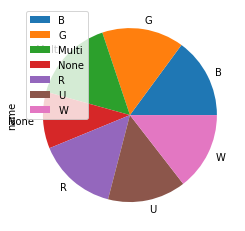

In [69]:
all_cards_df.groupby(['overall_color']).count().plot(kind='pie', y='name')